# Galaxy evolution as a function of cosmic time

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as mp
from google.colab import drive
import os
%matplotlib inline

- All not change with redshift
- separation between passives and sf galaxies
- dust gives sfr activity BUT is proportional to the mass of the galaxy

In [ ]:
drive.mount('/content/drive/', force_remount=True)
path = "/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 3"
os.listdir(path)

Mounted at /content/drive/


['SPS_modelling', '3DHST_Allfields.fits']

In [ ]:

open("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 3/3DHST_Allfields.fits")

<_io.TextIOWrapper name='/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 3/3DHST_Allfields.fits' mode='r' encoding='utf-8'>

In [ ]:

from astropy.table import Table
sim = Table.read("/content/drive/My Drive/lab Astro MAGISTRALE/Hands-on Session 3/3DHST_Allfields.fits")
print(sim.keys()) #Av = visual extincion: how much visual light is absorbed and scattered by the dust
print(sim)
redshift = sim["z_best"]
print(redshift)

['id', 'fieldnr', 'field', 'ra', 'dec', 'm_F140W', 'z_best', 'z_best_l68', 'z_best_u68', 'ltau', 'lage', 'Av', 'lmass', 'lsfr', 'UmV', 'VmJ']
  id  fieldnr field ...  lsfr         UmV                VmJ        
----- ------- ----- ... ------ ------------------ ------------------
  371       1   COS ...   0.29  1.512697758853692  1.103149830754574
  419       1   COS ...   1.15 0.8545426058007245 0.6844496655278218
  431       1   COS ...  -0.67 0.7890044278411936 0.3758958366095265
  445       1   COS ...   -0.8  2.233808160656129 1.4830089803500717
  457       1   COS ...  -0.66 0.6380218585520303 0.4037019434711371
  540       1   COS ...   0.44 0.9906394658284329 0.8831850794882622
  579       1   COS ...   1.14  2.302854774777283  2.170686790556522
  593       1   COS ...  -0.45 0.7566021336386908 0.3875397754965964
  623       1   COS ...   1.02 1.0798872663372283  1.467110941271971
  729       1   COS ...  -0.49 1.1498884801572702 1.3356569317823617
  ...     ...   ... ...    ...

In [ ]:
print(np.min(redshift), np.max(redshift))

0.2269 2.99283


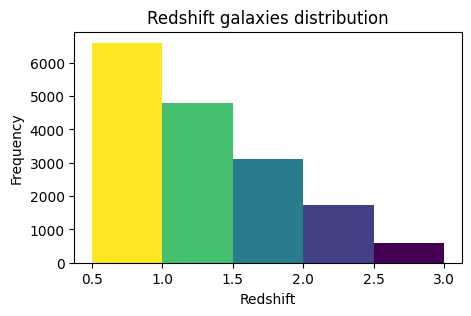

In [ ]:
import matplotlib.colors as colors

fig = mp.figure(figsize=(5, 3))
counts, bins, patches = mp.hist(redshift, range=(0.5, 3), bins=5)
mp.xlabel('Redshift')
mp.ylabel('Frequency')
mp.title('Redshift galaxies distribution')

# Color the bars based on height
colormap = mp.cm.viridis # You can choose a different colormap
normalize = colors.Normalize(vmin=counts.min(), vmax=counts.max())

for count, patch in zip(counts, patches):
    color = colormap(normalize(count))
    patch.set_facecolor(color)

from google.colab import files
#mp.savefig('1_zdist_hist.png')
#files.download('1_zdist_hist.png')

mp.show()
#mp.rcParams['text.usetex'] = True # Re-enable LaTeX rendering if needed for subsequent plots

In [ ]:
lmass = sim["lmass"]
lsfr = sim["lsfr"]
dust = sim["Av"] #less dust -> less SFR, BUT dust prop. to the mass of the galaxy
UmV = sim["UmV"]
VmJ = sim["VmJ"]

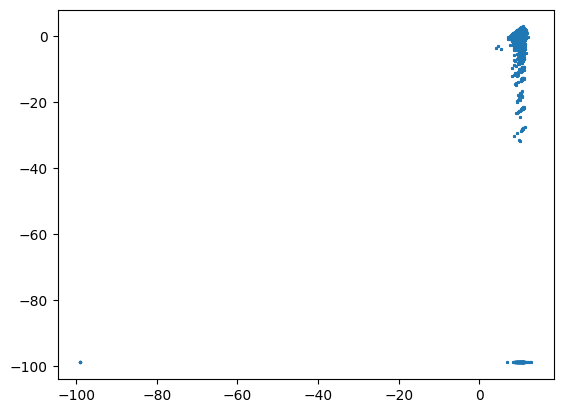

In [ ]:
mp.plot(lmass, lsfr, "*", ms=2)

In [ ]:
#cleaning te dataset
lmassV = []
lsfrV = []

#np.where()
for i in range(len(redshift)):
    if 1 <= redshift[i] <= 1.5:
      if lmass[i] >= 0 and lsfr[i] >= -4:
        lmassV.append(lmass[i])
        lsfrV.append(lsfr[i])

print(lmassV)
print(lsfrV)

[np.float32(10.65), np.float32(10.48), np.float32(11.2), np.float32(9.24), np.float32(9.22), np.float32(9.11), np.float32(9.8), np.float32(9.23), np.float32(9.53), np.float32(9.62), np.float32(10.11), np.float32(9.1), np.float32(9.43), np.float32(10.73), np.float32(10.17), np.float32(9.36), np.float32(9.87), np.float32(9.74), np.float32(9.7), np.float32(10.77), np.float32(9.41), np.float32(11.07), np.float32(9.63), np.float32(9.62), np.float32(9.56), np.float32(9.42), np.float32(9.12), np.float32(9.59), np.float32(9.39), np.float32(10.58), np.float32(9.34), np.float32(9.37), np.float32(10.24), np.float32(11.13), np.float32(10.43), np.float32(9.77), np.float32(9.83), np.float32(9.6), np.float32(9.44), np.float32(9.29), np.float32(9.08), np.float32(10.0), np.float32(9.3), np.float32(9.16), np.float32(9.64), np.float32(9.3), np.float32(9.92), np.float32(9.18), np.float32(9.49), np.float32(9.25), np.float32(9.04), np.float32(9.15), np.float32(9.48), np.float32(9.27), np.float32(10.89), np.

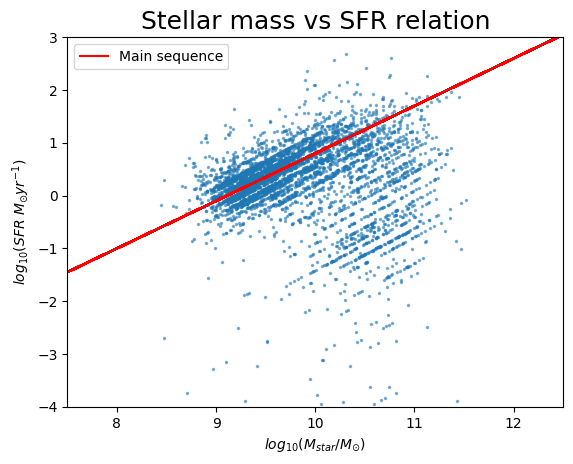

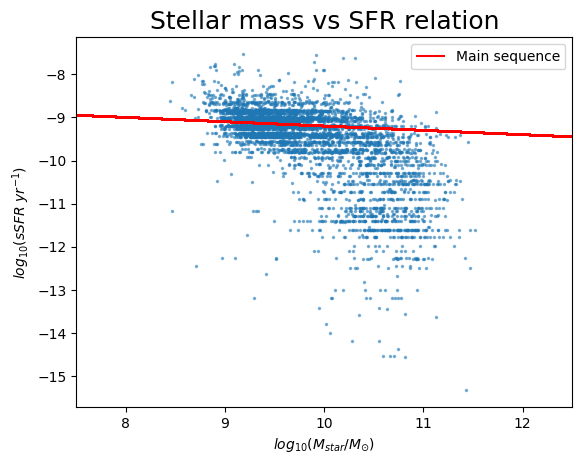

In [ ]:
#from scipy.stats import linregress

x = np.random.uniform(7, 13, 1000)
y = x*(0.9) - 8.2
y2 = x*(0.9-1) -8.2

#fig = mp.figure(figsize=(6, 4))
mp.plot(lmassV, lsfrV, ".", ms=3, alpha=0.5)
mp.plot(x,y, color='red', label='Main sequence')
mp.xlabel(r'$log_{10}(M_{star}/M_{\odot})$')
mp.ylabel(r'$log_{10}(SFR\ M_{\odot}yr^{-1})$')
mp.title('Stellar mass vs SFR relation', fontsize=18)
mp.xlim(7.5, 12.5)
mp.ylim(-4, 3)
mp.legend()

#mp.savefig('M_SFR_mainseq.png')
#files.download('M_SFR_mainseq.png')

mp.show()

#fig = mp.figure(figsize=(6, 4))
mp.plot(lmassV, np.array(lsfrV)-np.array(lmassV), ".", ms=3, alpha=0.5)
mp.plot(x, y2, color='red', label='Main sequence')
#mp.plot(x, [-9.2 for i in range(len(x))], color='red', label='Main sequence')
mp.xlabel(r'$log_{10}(M_{star}/M_{\odot})$')
mp.ylabel(r'$log_{10}(sSFR\ yr^{-1})$')
mp.title('Stellar mass vs SFR relation', fontsize=18)
mp.xlim(7.5, 12.5)
#mp.ylim(-4, 3)
mp.legend()

#mp.savefig('M_sSFR_mainseq.png')
#files.download('M_sSFR_mainseq.png')

mp.show()

In [ ]:
print(np.min(VmJ), np.max(VmJ))
print(np.min(UmV), np.max(UmV))

-8.308619679464513 3.62284539725469
-0.7526327688366288 4.556761766756453


In [ ]:
lmasstot = []
lsfrtot = []
dusttot = []
VmJtot = []
UmVtot = []

#np.where()
for i in range(len(redshift)):
  if lmass[i] >= 8 and lsfr[i] >= -4 and -4 < VmJ[i] < 4:
    lmasstot.append(lmass[i])
    lsfrtot.append(lsfr[i])
    dusttot.append(dust[i])
    VmJtot.append(VmJ[i])
    UmVtot.append(UmV[i])

print(lmasstot)
print(lsfrtot)

[np.float32(10.65), np.float32(10.05), np.float32(8.79), np.float32(10.48), np.float32(9.13), np.float32(9.49), np.float32(11.42), np.float32(8.95), np.float32(10.02), np.float32(9.81), np.float32(10.84), np.float32(11.2), np.float32(9.93), np.float32(9.52), np.float32(9.49), np.float32(11.12), np.float32(10.12), np.float32(9.54), np.float32(9.94), np.float32(9.52), np.float32(9.24), np.float32(10.9), np.float32(10.0), np.float32(9.67), np.float32(9.52), np.float32(10.91), np.float32(9.22), np.float32(9.11), np.float32(11.33), np.float32(9.8), np.float32(9.23), np.float32(8.93), np.float32(9.53), np.float32(10.23), np.float32(9.62), np.float32(10.16), np.float32(10.21), np.float32(9.42), np.float32(10.45), np.float32(8.89), np.float32(9.87), np.float32(10.35), np.float32(8.5), np.float32(10.34), np.float32(10.11), np.float32(10.2), np.float32(9.1), np.float32(9.11), np.float32(9.43), np.float32(10.49), np.float32(9.71), np.float32(10.8), np.float32(9.84), np.float32(10.14), np.float32(

In [ ]:
redshiftV = []

for i in range(len(redshift)):
  if lmass[i] >= 8 and lsfr[i] >= -4 and -4 < VmJ[i] < 4:
    redshiftV.append(redshift[i])

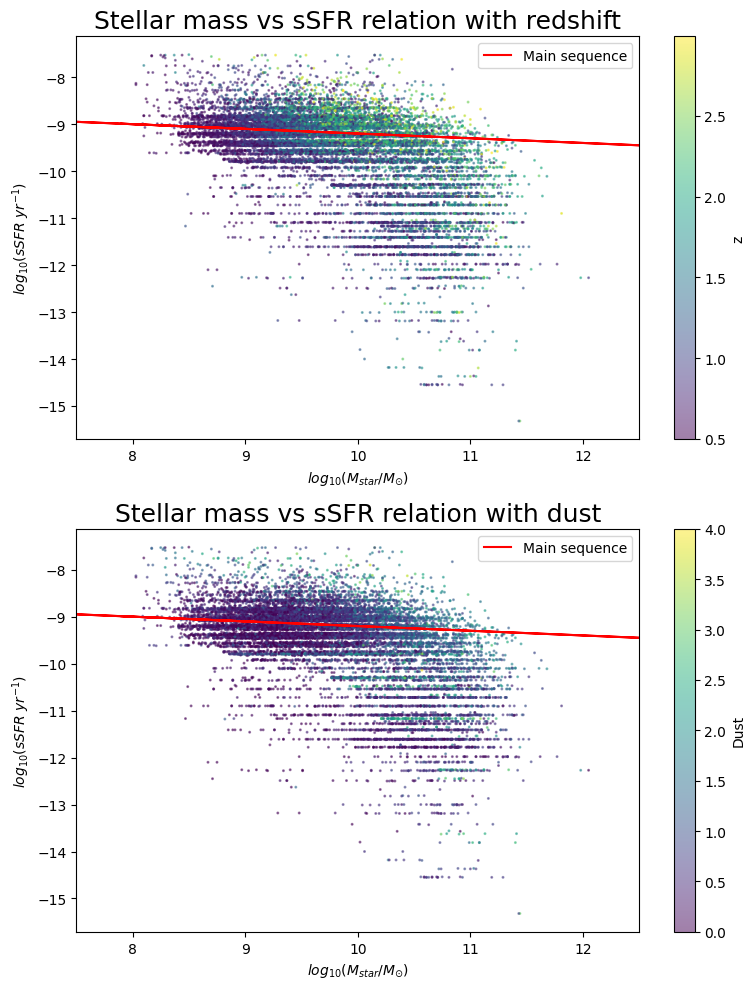

In [ ]:
#x = np.random.uniform(7, 13, 1000)
#y = x*0.9 - 9.2
#y2 = x*(-0.1) - 8.2

fig, axes = mp.subplots(2, 1, figsize=(8, 10))
ax1 = axes[0]
ax2 = axes[1]

scatter1 = ax1.scatter(lmasstot, np.array(lsfrtot)-np.array(lmasstot), c=redshiftV, marker='.', alpha=0.5, s=5, cmap='viridis')
fig.colorbar(scatter1, ax=ax1, label='z')
ax1.plot(x,y2, color='red', label='Main sequence')
ax1.set_xlabel(r'$log_{10}(M_{star}/M_{\odot})$')
ax1.set_ylabel(r'$log_{10}(sSFR\ yr^{-1})$')
ax1.set_title('Stellar mass vs sSFR relation with redshift', fontsize=18)
ax1.set_xlim(7.5, 12.5)
ax1.legend()

#mp.savefig('2_MvsSFR_ztot.png')
#files.download('2_MvsSFR_ztot.png')

scatter2 = ax2.scatter(lmasstot, np.array(lsfrtot)-np.array(lmasstot), c=dusttot, marker='.', alpha=0.5, s=5, cmap='viridis')
fig.colorbar(scatter2, ax=ax2, label='Dust')
ax2.plot(x, y2, color='red', label='Main sequence')
ax2.set_xlabel(r'$log_{10}(M_{star}/M_{\odot})$')
ax2.set_ylabel(r'$log_{10}(sSFR\ yr^{-1})$')
ax2.set_title('Stellar mass vs sSFR relation with dust', fontsize=18)
ax2.set_xlim(7.5, 12.5)
ax2.legend()

mp.tight_layout()

#fig.savefig('2_MvsSFR_dus&z.png')
#files.download('2_MvsSFR_dus&z.png')

mp.show()

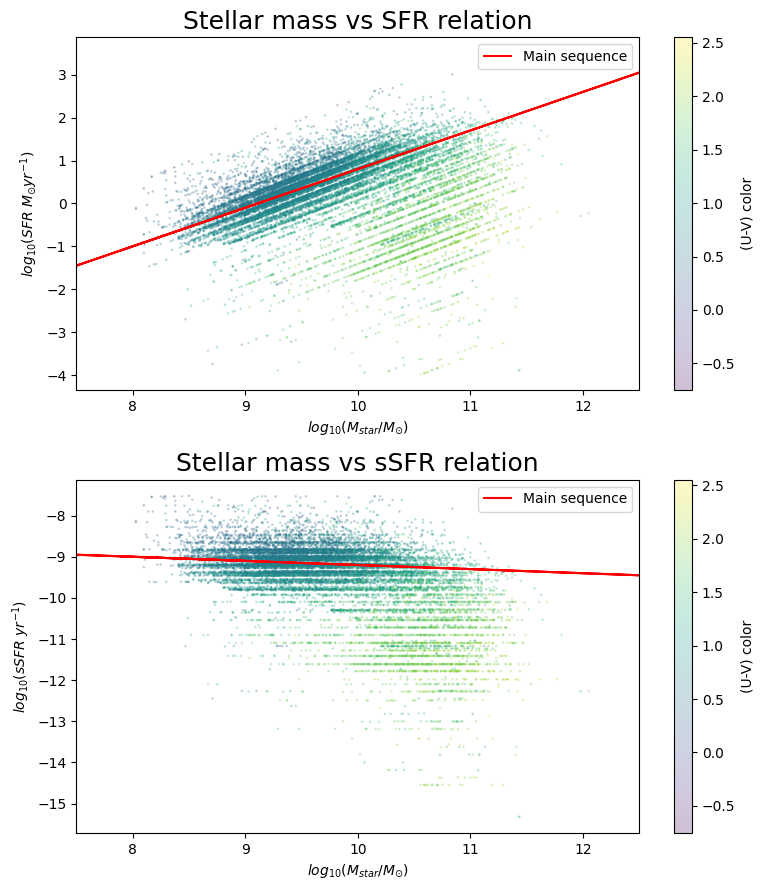

In [ ]:
fig, axes = mp.subplots(2, 1, figsize=(8, 9))
ax1 = axes[0]
ax2 = axes[1]

scatter1 = ax1.scatter(lmasstot, lsfrtot, alpha = 0.25, c=UmVtot, marker='.', s=3, cmap='viridis')
ax1.plot(x, y, color='red', label='Main sequence')
ax1.set_xlabel(r'$log_{10}(M_{star}/M_{\odot})$')
ax1.set_ylabel(r'$log_{10}(SFR\ M_{\odot}yr^{-1})$')
fig.colorbar(scatter1, ax=ax1, label='(U-V) color')
ax1.set_title('Stellar mass vs SFR relation', fontsize=18)
ax1.set_xlim(7.5, 12.5)
ax1.legend()

scatter2 = ax2.scatter(lmasstot, np.array(lsfrtot)-np.array(lmasstot), alpha = 0.25, c=UmVtot, marker='.', s=3, cmap='viridis')
ax2.plot(x, y2, color='red', label='Main sequence')
ax2.set_xlabel(r'$log_{10}(M_{star}/M_{\odot})$')
ax2.set_ylabel(r'$log_{10}(sSFR\ yr^{-1})$')
fig.colorbar(scatter1, ax=ax2, label='(U-V) color')
ax2.set_title('Stellar mass vs sSFR relation', fontsize=18)
ax2.set_xlim(7.5, 12.5)
ax2.legend()

fig.tight_layout()

#fig.savefig('10_MvsSFR_UVJ.png')
#files.download('10_MvsSFR_UVJ.png')

mp.show()

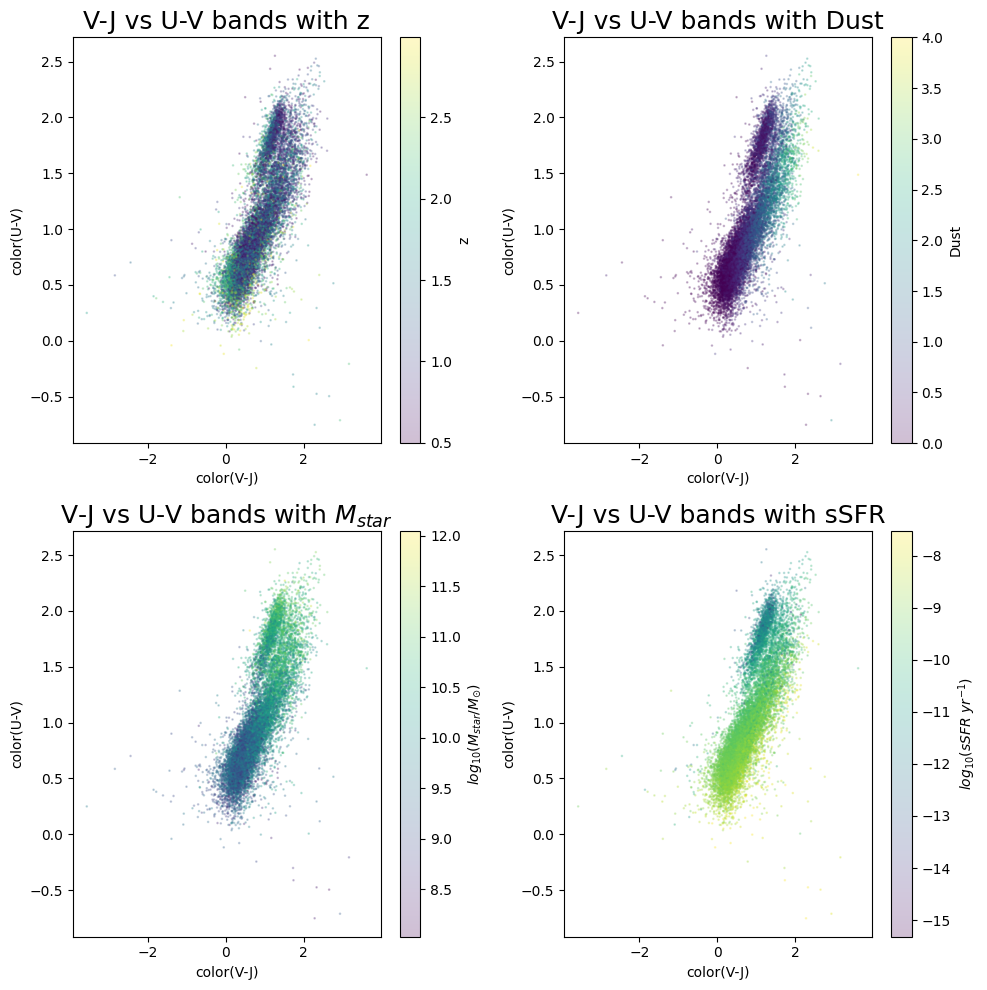

In [ ]:
fig, axes = mp.subplots(2, 2, figsize=(10, 10))
ax0 = axes[0,0]
ax1 = axes[0,1]
ax2 = axes[1,0]
ax3 = axes[1,1]

scatter0 = ax0.scatter(VmJtot, UmVtot, alpha = 0.25, c=redshiftV, marker='.', s=3, cmap='viridis')
ax0.set_xlabel('color(V-J)')
ax0.set_ylabel('color(U-V)')
fig.colorbar(scatter0, ax=ax0, label='z')
ax0.set_title('V-J vs U-V bands with z', fontsize=18)

scatter1 = ax1.scatter(VmJtot, UmVtot, alpha = 0.25, c=dusttot, marker='.', s=3, cmap='viridis')
ax1.set_xlabel('color(V-J)')
ax1.set_ylabel('color(U-V)')
fig.colorbar(scatter1, ax=ax1, label='Dust')
ax1.set_title('V-J vs U-V bands with Dust', fontsize=18)


scatter3 = ax3.scatter(VmJtot, UmVtot, alpha = 0.25, c=(np.array(lsfrtot)-np.array(lmasstot)), marker='.', s=3, cmap='viridis')
ax3.set_xlabel('color(V-J)')
ax3.set_ylabel('color(U-V)')
fig.colorbar(scatter3, ax=ax3, label='$log_{10}(sSFR\ yr^{-1})$') #specific SFR
ax3.set_title('V-J vs U-V bands with sSFR', fontsize=18)

scatter2 = ax2.scatter(VmJtot, UmVtot, alpha = 0.25, c=np.array(lmasstot), marker='.', s=3, cmap='viridis')
ax2.set_xlabel('color(V-J)')
ax2.set_ylabel('color(U-V)')
fig.colorbar(scatter2, ax=ax2, label='$log_{10}(M_{star}/M_{\odot})$') #stellar mass
ax2.set_title(r'V-J vs U-V bands with $M_{star}$', fontsize=18)

mp.tight_layout()

#fig.savefig('3_UVJ_dus&z&SFR.png')
#files.download('3_UVJ_dus&z&SFR.png')

mp.show()

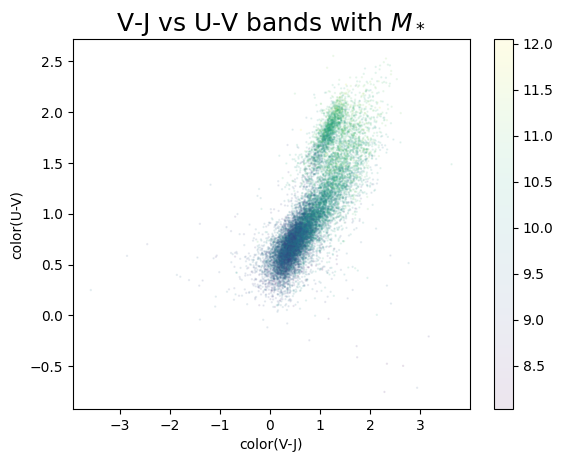

In [ ]:
#fig=mp.figure(figsize=(15, 15))
mp.scatter(VmJtot, UmVtot, c=lmasstot, alpha=0.1, cmap='viridis', marker='.', s=2, label=r'$M_*$')
mp.xlabel('color(V-J)')
mp.ylabel('color(U-V)')
mp.title(r'V-J vs U-V bands with $M_*$', fontsize=18)
mp.colorbar()
mp.show()

## Passive galaxies

In [ ]:
UVJ_lmass_1 = []
UVJ_lsfr_1 = []
UVJ_dust_1 = []
UVJ_VmJ_1 = []
UVJ_UmV_1 = []
UVJ_lmass_2 = []
UVJ_lsfr_2 = []
UVJ_dust_2 = []
UVJ_VmJ_2 = []
UVJ_UmV_2 = []
UVJ_lmass_3 = []
UVJ_lsfr_3 = []
UVJ_dust_3 = []
UVJ_VmJ_3 = []
UVJ_UmV_3 = []
UVJ_lmass_4 = []
UVJ_lsfr_4 = []
UVJ_dust_4 = []
UVJ_VmJ_4 = []
UVJ_UmV_4 = []
UVJ_lmass_5 = []
UVJ_lsfr_5 = []
UVJ_dust_5 = []
UVJ_VmJ_5 = []
UVJ_UmV_5 = []

In [ ]:
for i in range(len(redshiftV)):
    if 0.5 <= redshiftV[i] < 1:
      if VmJtot[i] < 1.6 and UmVtot[i] > 1.3 and (UmVtot[i]>0.88*VmJtot[i]+0.59):
        UVJ_lmass_1.append(lmasstot[i])
        UVJ_lsfr_1.append(lsfrtot[i])
        UVJ_dust_1.append(dusttot[i])
        UVJ_VmJ_1.append(VmJtot[i])
        UVJ_UmV_1.append(UmVtot[i])
    if 1 <= redshiftV[i] < 1.5:
      if VmJtot[i] < 1.6 and UmVtot[i] > 1.3 and (UmVtot[i]>0.88*VmJtot[i]+0.59):
       UVJ_lmass_2.append(lmasstot[i])
       UVJ_lsfr_2.append(lsfrtot[i])
       UVJ_dust_2.append(dusttot[i])
       UVJ_VmJ_2.append(VmJtot[i])
       UVJ_UmV_2.append(UmVtot[i])
    if 1.5 <= redshiftV[i] < 2:
      if VmJtot[i] < 1.6 and UmVtot[i] > 1.3 and (UmVtot[i]>0.88*VmJtot[i]+0.59):
       UVJ_lmass_3.append(lmasstot[i])
       UVJ_lsfr_3.append(lsfrtot[i])
       UVJ_dust_3.append(dusttot[i])
       UVJ_VmJ_3.append(VmJtot[i])
       UVJ_UmV_3.append(UmVtot[i])
    if 2 <= redshiftV[i] < 2.5:
      if VmJtot[i] < 1.6 and UmVtot[i] > 1.3 and (UmVtot[i]>0.88*VmJtot[i]+0.59):
        UVJ_lmass_4.append(lmasstot[i])
        UVJ_lsfr_4.append(lsfrtot[i])
        UVJ_dust_4.append(dusttot[i])
        UVJ_VmJ_4.append(VmJtot[i])
        UVJ_UmV_4.append(UmVtot[i])
    if 2.5 <= redshiftV[i] <= 3:
      if VmJtot[i] < 1.6 and UmVtot[i] > 1.3 and (UmVtot[i]>0.88*VmJtot[i]+0.59):
        UVJ_lmass_5.append(lmasstot[i])
        UVJ_lsfr_5.append(lsfrtot[i])
        UVJ_dust_5.append(dusttot[i])
        UVJ_VmJ_5.append(VmJtot[i])
        UVJ_UmV_5.append(UmVtot[i])


#print(UVJ_lmass)
#print(UVJ_lsfr)

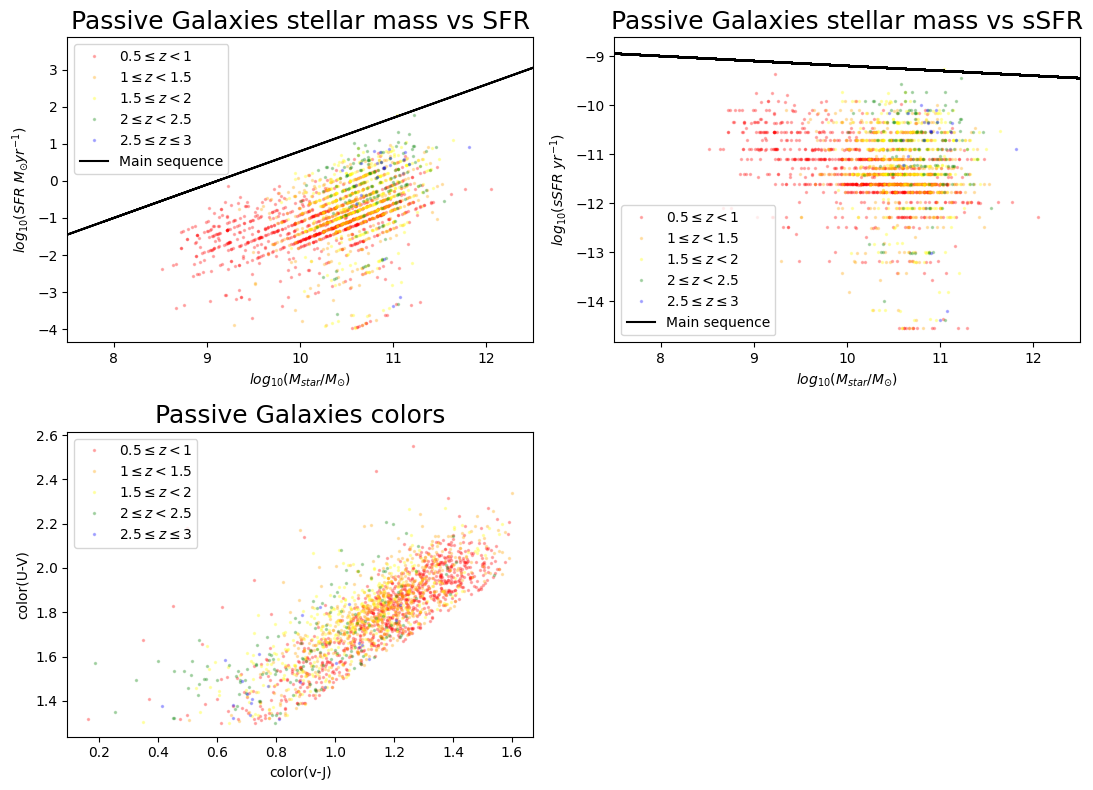

In [ ]:
fig, axes = mp.subplots(2, 2, figsize=(11, 8))
ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]

# Plot 1 (Passive galaxies stellar mass vs SFR)
ax1.plot(UVJ_lmass_1, UVJ_lsfr_1, ".", alpha=0.25, ms=3, color="red", label='$0.5 \leq z < 1$')
ax1.plot(UVJ_lmass_2, UVJ_lsfr_2, ".", alpha=0.25, ms=3, color="orange", label='$1 \leq z < 1.5$')
ax1.plot(UVJ_lmass_3, UVJ_lsfr_3, ".", alpha=0.25, ms=3, color="yellow", label='$1.5 \leq z < 2$')
ax1.plot(UVJ_lmass_4, UVJ_lsfr_4, ".", alpha=0.25, ms=3, color="green", label='$2 \leq z < 2.5$')
ax1.plot(UVJ_lmass_5, UVJ_lsfr_5, ".", alpha=0.25, ms=3, color="blue", label='$2.5 \leq z \leq 3$')
ax1.plot(x,y, color='black', ms=0.2, label='Main sequence')
ax1.set_xlabel('$log_{10}(M_{star}/M_{\odot})$')
ax1.set_ylabel('$log_{10}(SFR\ M_{\odot}yr^{-1})$')
ax1.set_title('Passive Galaxies stellar mass vs SFR', fontsize=18)
ax1.set_xlim(7.5,12.5)
ax1.legend()

# Plot 2 (Passive galaxies stellar mass vs sSFR)
ax2.plot(UVJ_lmass_1, np.array(UVJ_lsfr_1) - np.array(UVJ_lmass_1), ".", alpha=0.25, ms=3, color="red", label='$0.5 \leq z < 1$')
ax2.plot(UVJ_lmass_2, np.array(UVJ_lsfr_2) - np.array(UVJ_lmass_2), ".", alpha=0.25, ms=3, color="orange", label='$1 \leq z < 1.5$')
ax2.plot(UVJ_lmass_3, np.array(UVJ_lsfr_3) - np.array(UVJ_lmass_3), ".", alpha=0.25, ms=3, color="yellow", label='$1.5 \leq z < 2$')
ax2.plot(UVJ_lmass_4, np.array(UVJ_lsfr_4) - np.array(UVJ_lmass_4), ".", alpha=0.25, ms=3, color="green", label='$2 \leq z < 2.5$')
ax2.plot(UVJ_lmass_5, np.array(UVJ_lsfr_5) - np.array(UVJ_lmass_5), ".", alpha=0.25, ms=3, color="blue", label='$2.5 \leq z \leq 3$')
ax2.plot(x,y2, color='black', ms=0.2, label='Main sequence')
ax2.set_xlabel('$log_{10}(M_{star}/M_{\odot})$')
ax2.set_ylabel('$log_{10}(sSFR\ yr^{-1})$')
ax2.set_title('Passive Galaxies stellar mass vs sSFR', fontsize=18)
ax2.set_xlim(7.5,12.5)
ax2.legend()

# Plot 3 (Passive galaxies colors)
ax3.plot(UVJ_VmJ_1, UVJ_UmV_1, ".", alpha=0.25, ms=3, color='red', label='$0.5 \leq z < 1$')
ax3.plot(UVJ_VmJ_2, UVJ_UmV_2, ".", alpha=0.25, ms=3, color='orange', label='$1 \leq z < 1.5$')
ax3.plot(UVJ_VmJ_3, UVJ_UmV_3, ".", alpha=0.25, ms=3, color='yellow', label='$1.5 \leq z < 2$')
ax3.plot(UVJ_VmJ_4, UVJ_UmV_4, ".", alpha=0.25, ms=3, color='green', label='$2 \leq z < 2.5$')
ax3.plot(UVJ_VmJ_5, UVJ_UmV_5, ".", alpha=0.25, ms=3, color='blue', label='$2.5 \leq z \leq 3$')
ax3.set_xlabel('color(v-J)')
ax3.set_ylabel('color(U-V)')
ax3.set_title('Passive Galaxies colors', fontsize=18)
#ax3.set_xlim(-2, 2)
ax3.legend()

fig.delaxes(axes[1,1])

mp.tight_layout()

#fig.savefig('4_passive_SFR&sSFR&UVJ.png')
#files.download('4_passive_SFR&sSFR&UVJ.png')

mp.show()

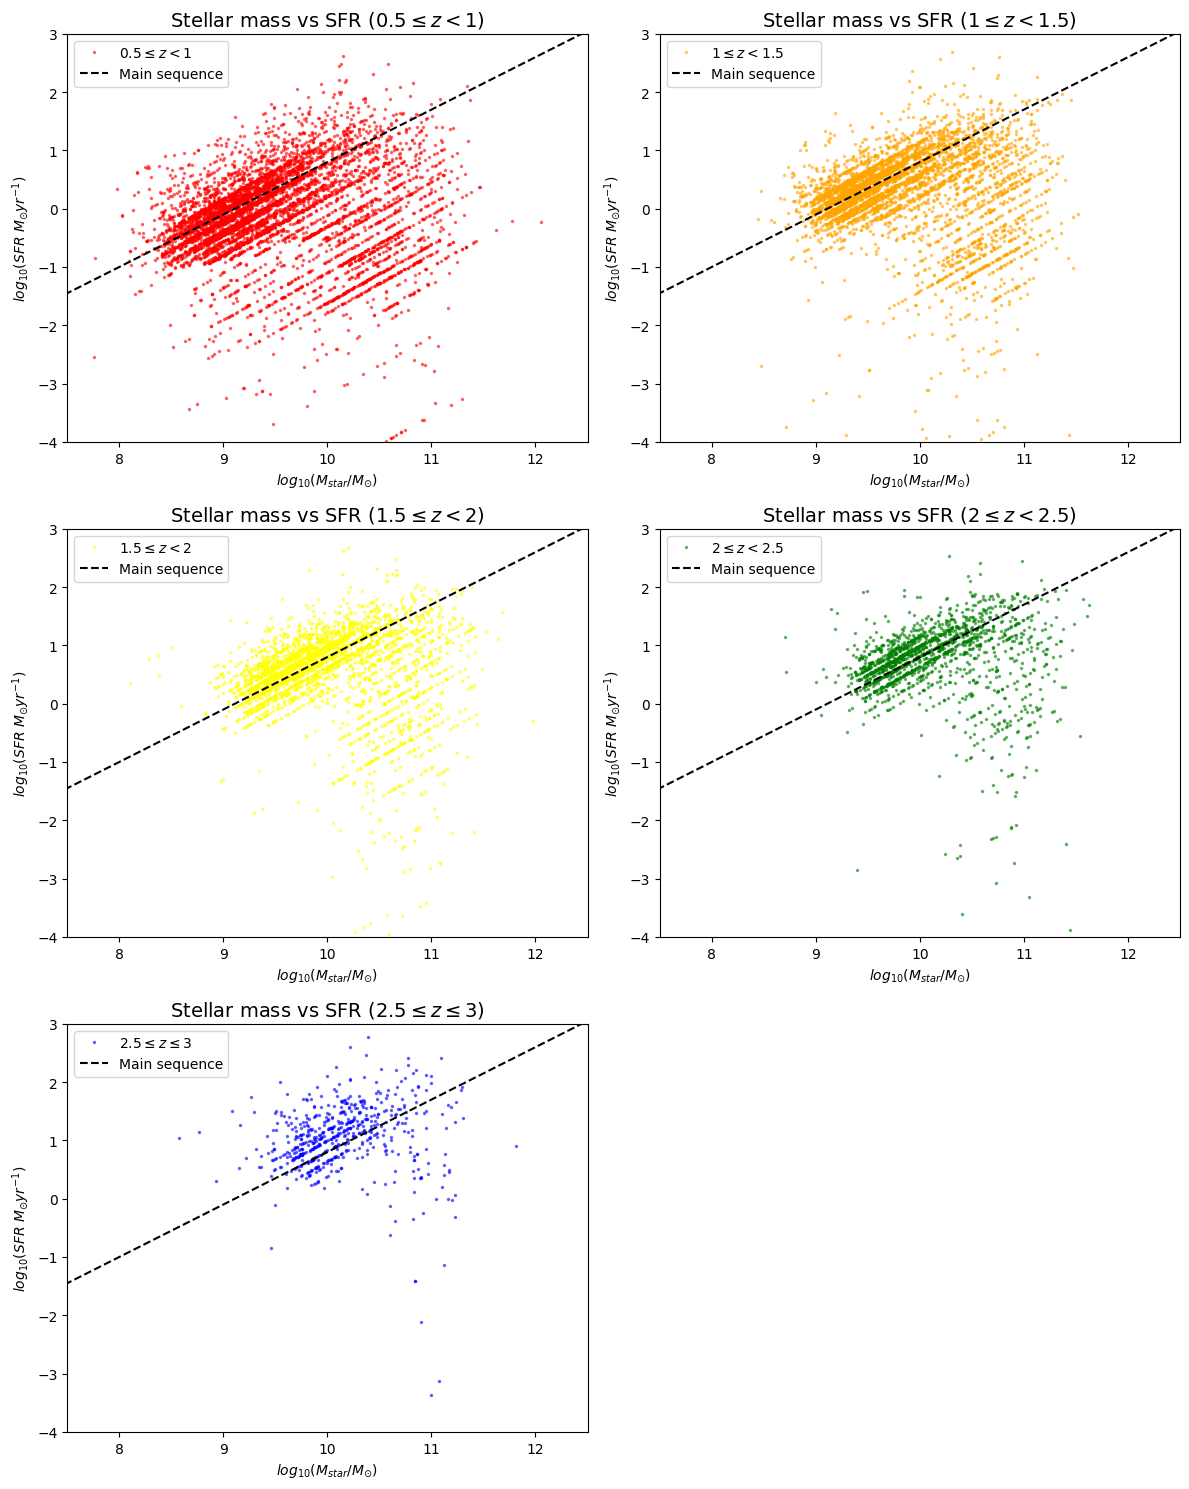

In [ ]:
import numpy as np
# Redshift bins
z_bins = [(0.5, 1), (1, 1.5), (1.5, 2), (2, 2.5), (2.5, 3)]
z_labels = ['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z \leq 3$']
colors = ['red', 'orange', 'yellow', 'green', 'blue']

fig, axes = mp.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Remove the last axis if there's an odd number of subplots
if len(z_bins) % 2 != 0:
    fig.delaxes(axes[-1])
    axes = axes[:-1]

# Plot for each redshift bin
for i, (z_min, z_max) in enumerate(z_bins):
    ax = axes[i]
    current_color = colors[i]

    # Filter data for the current redshift bin
    mask = (redshift >= z_min) & (redshift < z_max) & (lmass >= 0) & (lsfr >= -4)
    lmass_bin = lmass[mask]
    lsfr_bin = lsfr[mask]

    ax.plot(lmass_bin, lsfr_bin, ".", ms=3, alpha=0.5, color=current_color, label=z_labels[i])

    # Add the main sequence line
    x_ms = np.array([7, 13])
    y_ms = x_ms * 0.9 - 8.2
    ax.plot(x_ms, y_ms, color='black', linestyle='--', label='Main sequence')


    ax.set_xlabel(r'$log_{10}(M_{star}/M_{\odot})$')
    ax.set_ylabel(r'$log_{10}(SFR\ M_{\odot}yr^{-1})$')
    ax.set_title(f'Stellar mass vs SFR ({z_labels[i]})', fontsize=14)
    ax.set_xlim(7.5, 12.5)
    ax.set_ylim(-4, 3)
    ax.legend()

mp.tight_layout()
mp.show()


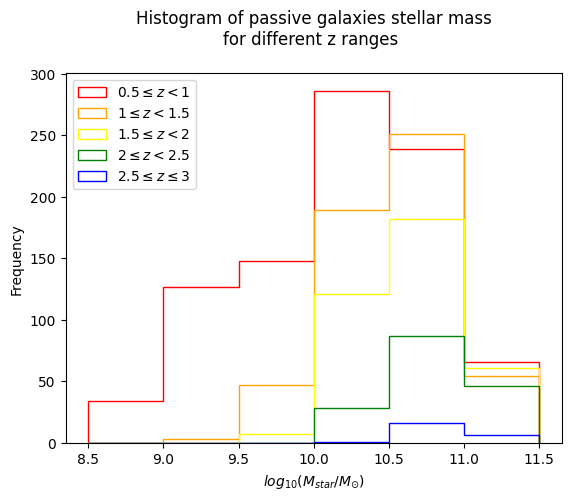

[ 34. 127. 148. 286. 239.  66.] [  0.   3.  47. 189. 251.  54.] [  0.   0.   7. 121. 182.  61.] [ 0.  0.  0. 28. 87. 46.] [ 0.  0.  0.  1. 16.  6.]


In [ ]:
#mp.figure(figsize=(10, 6))

p1_1, p1_2, p1_3 = mp.hist(UVJ_lmass_1, bins=6, range=(8.5, 11.5), label='$0.5 \leq z < 1$', histtype='step', color='red')
p2_1, p2_2, p2_3 = mp.hist(UVJ_lmass_2, bins=6, range=(8.5, 11.5), label='$1 \leq z < 1.5$', histtype='step', color='orange')
p3_1, p3_2, p3_3 = mp.hist(UVJ_lmass_3, bins=6, range=(8.5, 11.5), label='$1.5 \leq z < 2$', histtype='step', color='yellow')
p4_1, p4_2, p4_3 = mp.hist(UVJ_lmass_4, bins=6, range=(8.5, 11.5), label='$2 \leq z < 2.5$', histtype='step', color='green')
p5_1, p5_2, p5_3 = mp.hist(UVJ_lmass_5, bins=6, range=(8.5, 11.5), label='$2.5 \leq z \leq 3$', histtype='step', color='blue')

mp.xlabel('$log_{10}(M_{star}/M_{\odot})$')
mp.ylabel('Frequency')
mp.title('Histogram of passive galaxies stellar mass' '\n' 'for different z ranges \n')
mp.legend()

#mp.savefig('5_passivefrac.png')
#files.download('5_passivefrac.png')

mp.show()

print(p1_1, p2_1, p3_1, p4_1, p5_1)

## Active Galaxies

In [ ]:
redshiftV_np = np.array(redshiftV)
VmJtot_np = np.array(VmJtot)
UmVtot_np = np.array(UmVtot)
lmasstot_np = np.array(lmasstot)
lsfrtot_np = np.array(lsfrtot)
dusttot_np = np.array(dusttot)

# Define the UVJ passive galaxy selection criteria
uvj_passive_cut = (VmJtot_np < 1.6) & (UmVtot_np > 1.3) & (UmVtot_np > 0.88 * VmJtot_np + 0.59)

# Select active galaxies by inverting the passive galaxy selection
active_galaxies_mask_1 = (0.5 <= redshiftV_np) & (redshiftV_np < 1) & ~uvj_passive_cut
active_galaxies_mask_2 = (1 <= redshiftV_np) & (redshiftV_np < 1.5) & ~uvj_passive_cut
active_galaxies_mask_3 = (1.5 <= redshiftV_np) & (redshiftV_np < 2) & ~uvj_passive_cut
active_galaxies_mask_4 = (2 <= redshiftV_np) & (redshiftV_np < 2.5) & ~uvj_passive_cut
active_galaxies_mask_5 = (2.5 <= redshiftV_np) & (redshiftV_np < 3) & ~uvj_passive_cut


mass_a1 = lmasstot_np[active_galaxies_mask_1]
lsfr_a1 = lsfrtot_np[active_galaxies_mask_1]
dust_a1 = dusttot_np[active_galaxies_mask_1]
VmJ_a1 = VmJtot_np[active_galaxies_mask_1]
UmV_a1 = UmVtot_np[active_galaxies_mask_1]

mass_a2 = lmasstot_np[active_galaxies_mask_2]
lsfr_a2 = lsfrtot_np[active_galaxies_mask_2]
dust_a2 = dusttot_np[active_galaxies_mask_2]
VmJ_a2 = VmJtot_np[active_galaxies_mask_2]
UmV_a2 = UmVtot_np[active_galaxies_mask_2]

mass_a3 = lmasstot_np[active_galaxies_mask_3]
lsfr_a3 = lsfrtot_np[active_galaxies_mask_3]
dust_a3 = dusttot_np[active_galaxies_mask_3]
VmJ_a3 = VmJtot_np[active_galaxies_mask_3]
UmV_a3 = UmVtot_np[active_galaxies_mask_3]

mass_a4 = lmasstot_np[active_galaxies_mask_4]
lsfr_a4 = lsfrtot_np[active_galaxies_mask_4]
dust_a4 = dusttot_np[active_galaxies_mask_4]
VmJ_a4 = VmJtot_np[active_galaxies_mask_4]
UmV_a4 = UmVtot_np[active_galaxies_mask_4]

mass_a5 = lmasstot_np[active_galaxies_mask_5]
lsfr_a5 = lsfrtot_np[active_galaxies_mask_5]
dust_a5 = dusttot_np[active_galaxies_mask_5]
VmJ_a5 = VmJtot_np[active_galaxies_mask_5]
UmV_a5 = UmVtot_np[active_galaxies_mask_5]

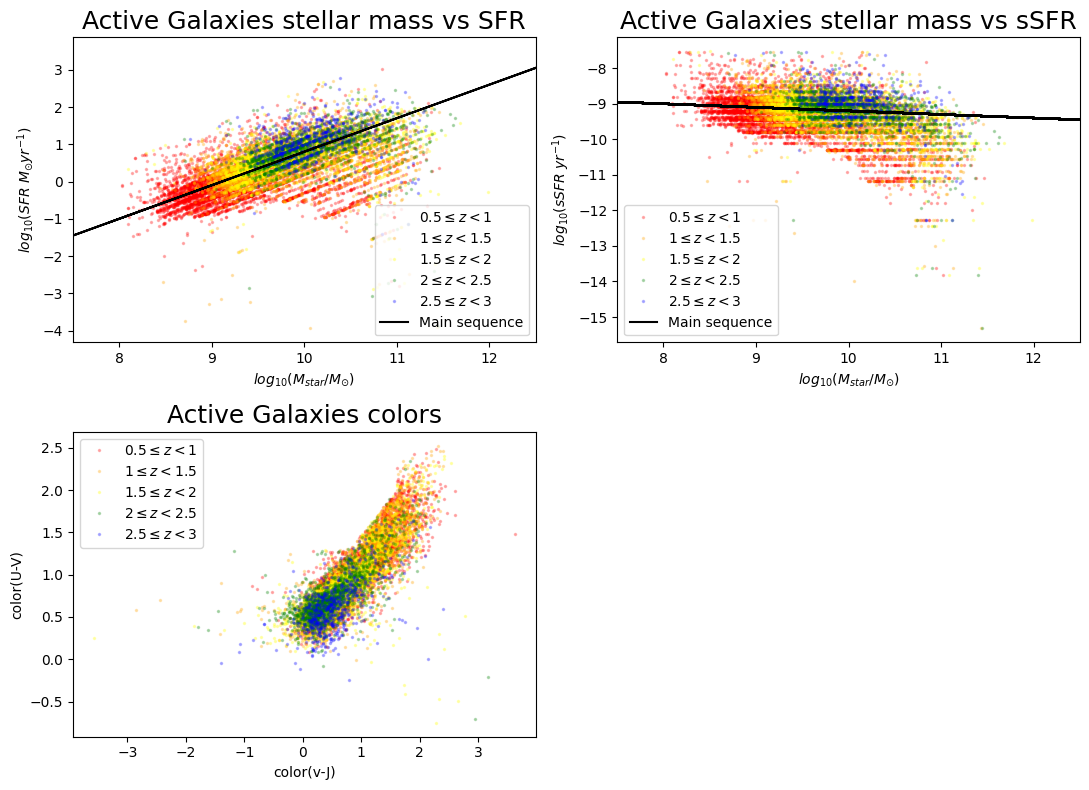

In [ ]:
import numpy as np
fig, axes = mp.subplots(2, 2, figsize=(11, 8))
ax4 = axes[0,0]
ax5 = axes[0,1]
ax6 = axes[1,0]
ax7 = axes[1,1]

# Plot 1 (Active galaxies stellar mass vs SFR)
ax4.plot(mass_a1, lsfr_a1, ".", alpha=0.25, ms=3, color="red", label='$0.5 \leq z < 1$')
ax4.plot(mass_a2, lsfr_a2, ".", alpha=0.25, ms=3, color="orange", label='$1 \leq z < 1.5$')
ax4.plot(mass_a3, lsfr_a3, ".", alpha=0.25, ms=3, color="yellow", label='$1.5 \leq z < 2$')
ax4.plot(mass_a4, lsfr_a4, ".", alpha=0.25, ms=3, color="green", label='$2 \leq z < 2.5$')
ax4.plot(mass_a5, lsfr_a5, ".", alpha=0.25, ms=3, color="blue", label='$2.5 \leq z < 3$')
ax4.plot(x,y, color='black', ms=0.2, label='Main sequence')
ax4.set_xlabel('$log_{10}(M_{star}/M_{\odot})$')
ax4.set_ylabel('$log_{10}(SFR\ M_{\odot}yr^{-1})$')
ax4.set_title('Active Galaxies stellar mass vs SFR', fontsize=18)
ax4.set_xlim(7.5,12.5)
ax4.legend()

# Plot 2 (Active galaxies stellar mass vs sSFR)
ax5.plot(mass_a1, np.array(lsfr_a1) - np.array(mass_a1), ".", alpha=0.25, ms=3, color="red", label='$0.5 \leq z < 1$')
ax5.plot(mass_a2, np.array(lsfr_a2) - np.array(mass_a2), ".", alpha=0.25, ms=3, color="orange", label='$1 \leq z < 1.5$')
ax5.plot(mass_a3, np.array(lsfr_a3) - np.array(mass_a3), ".", alpha=0.25, ms=3, color="yellow", label='$1.5 \leq z < 2$')
ax5.plot(mass_a4, np.array(lsfr_a4) - np.array(mass_a4), ".", alpha=0.25, ms=3, color="green", label='$2 \leq z < 2.5$')
ax5.plot(mass_a5, np.array(lsfr_a5) - np.array(mass_a5), ".", alpha=0.25, ms=3, color="blue", label='$2.5 \leq z < 3$')
ax5.plot(x,y2, color='black', ms=0.2, label='Main sequence')
ax5.set_xlabel('$log_{10}(M_{star}/M_{\odot})$')
ax5.set_ylabel('$log_{10}(sSFR\ yr^{-1})$')
ax5.set_title('Active Galaxies stellar mass vs sSFR', fontsize=18)
ax5.set_xlim(7.5,12.5)
ax5.legend()

# Plot 3 (Active galaxies colors)
ax6.plot(VmJ_a1, UmV_a1, ".", alpha=0.25, ms=3, color='red', label='$0.5 \leq z < 1$')
ax6.plot(VmJ_a2, UmV_a2, ".", alpha=0.25, ms=3, color='orange', label='$1 \leq z < 1.5$')
ax6.plot(VmJ_a3, UmV_a3, ".", alpha=0.25, ms=3, color='yellow', label='$1.5 \leq z < 2$')
ax6.plot(VmJ_a4, UmV_a4, ".", alpha=0.25, ms=3, color='green', label='$2 \leq z < 2.5$')
ax6.plot(VmJ_a5, UmV_a5, ".", alpha=0.25, ms=3, color='blue', label='$2.5 \leq z < 3$')
ax6.set_xlabel('color(v-J)')
ax6.set_ylabel('color(U-V)')
ax6.set_title('Active Galaxies colors', fontsize=18)
#ax6.set_xlim(-2, 2)
ax6.legend()

fig.delaxes(axes[1,1])

mp.tight_layout()

#fig.savefig('6_active_SFR&sSFR&UVJ.png')
#files.download('6_active_SFR&sSFR&UVJ.png')

mp.show()

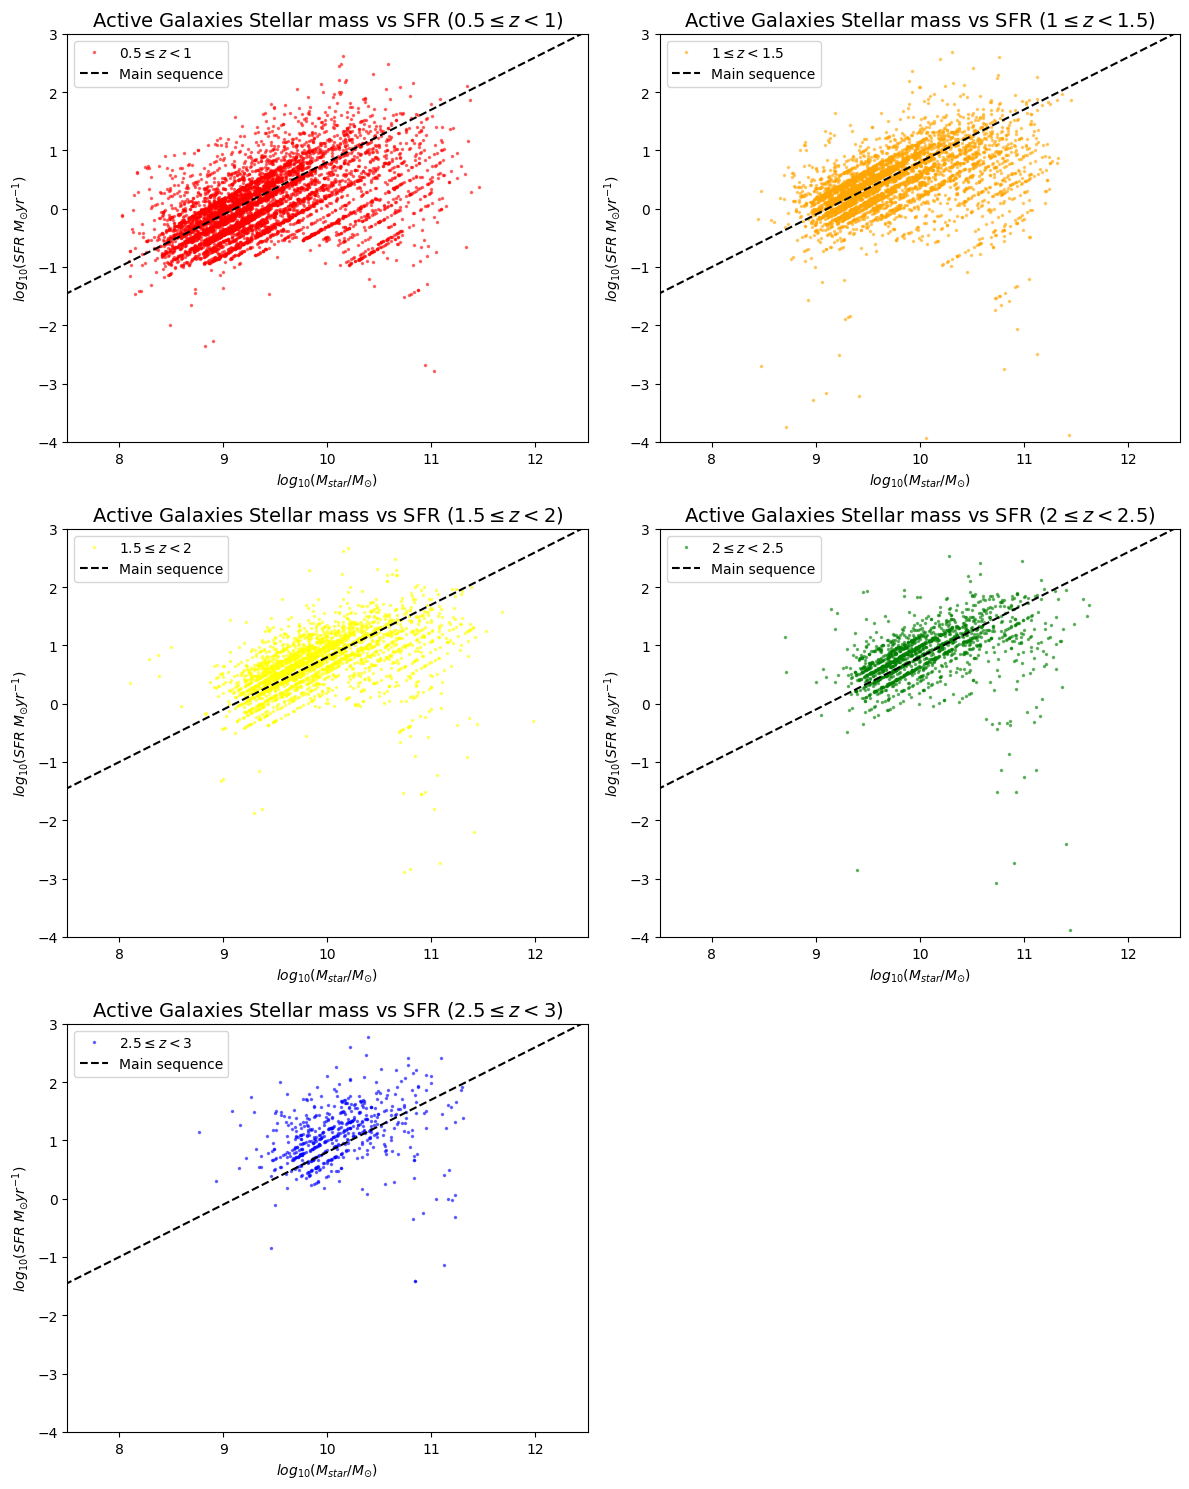

In [ ]:
# prompt: subplots figure con active galaxies stellar mass vs SFR per ogni redshift bin separatamente

import numpy as np
# Redshift bins for active galaxies
z_bins_active = [(0.5, 1), (1, 1.5), (1.5, 2), (2, 2.5), (2.5, 3)]
z_labels_active = ['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z < 3$']
colors_active = ['red', 'orange', 'yellow', 'green', 'blue']

fig, axes = mp.subplots(nrows=3, ncols=2, figsize=(12, 15))
axes = axes.flatten()

# Remove the last axis if there's an odd number of subplots (shouldn't happen with 5 bins)
if len(z_bins_active) % 2 != 0 and len(axes) > len(z_bins_active):
    fig.delaxes(axes[-1])
    axes = axes[:-1]

# Plot for each redshift bin for active galaxies
for i, (z_min, z_max) in enumerate(z_bins_active):
    ax = axes[i]
    current_color = colors_active[i]

    # Filter data for the current redshift bin and active galaxies
    mask_active_bin = (redshiftV_np >= z_min) & (redshiftV_np < z_max) & ~uvj_passive_cut
    lmass_active_bin = lmasstot_np[mask_active_bin]
    lsfr_active_bin = lsfrtot_np[mask_active_bin]

    ax.plot(lmass_active_bin, lsfr_active_bin, ".", ms=3, alpha=0.5, color=current_color, label=z_labels_active[i])

    # Add the main sequence line
    x_ms = np.array([7, 13])
    y_ms = x_ms * 0.9 - 8.2
    ax.plot(x_ms, y_ms, color='black', linestyle='--', label='Main sequence')


    ax.set_xlabel(r'$log_{10}(M_{star}/M_{\odot})$')
    ax.set_ylabel(r'$log_{10}(SFR\ M_{\odot}yr^{-1})$')
    ax.set_title(f'Active Galaxies Stellar mass vs SFR ({z_labels_active[i]})', fontsize=14)
    ax.set_xlim(7.5, 12.5)
    ax.set_ylim(-4, 3)
    ax.legend()

mp.tight_layout()
mp.show()



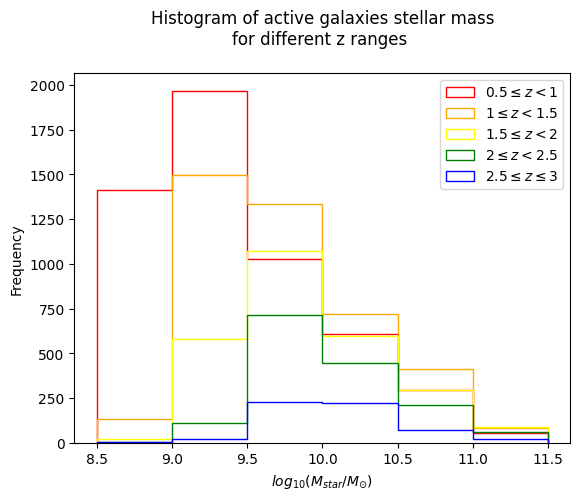

[1412. 1967. 1026.  607.  296.   56.] [ 131. 1496. 1334.  720.  414.   82.] [  19.  578. 1071.  595.  295.   87.] [  2. 112. 717. 446. 210.  58.] [  2.  22. 226. 225.  74.  20.]


In [ ]:
#mp.figure(figsize=(10, 6))

t1_1, t1_2, t1_3 = mp.hist(mass_a1, bins=6, range=(8.5, 11.5), label='$0.5 \leq z < 1$', histtype='step', color='red')
t2_1, t2_2, t2_3 = mp.hist(mass_a2, bins=6, range=(8.5, 11.5), label='$1 \leq z < 1.5$', histtype='step', color='orange')
t3_1, t3_2, t3_3 = mp.hist(mass_a3, bins=6, range=(8.5, 11.5), label='$1.5 \leq z < 2$', histtype='step', color='yellow')
t4_1, t4_2, t4_3 = mp.hist(mass_a4, bins=6, range=(8.5, 11.5), label='$2 \leq z < 2.5$', histtype='step', color='green')
t5_1, t5_2, t5_3 = mp.hist(mass_a5, bins=6, range=(8.5, 11.5), label='$2.5 \leq z \leq 3$', histtype='step', color='blue')

mp.xlabel('$log_{10}(M_{star}/M_{\odot})$')
mp.ylabel('Frequency')
mp.title('Histogram of active galaxies stellar mass' '\n' 'for different z ranges \n')
mp.legend()

#mp.savefig('5_activefrac.png')
#files.download('5_activefrac.png')

mp.show()

print(t1_1, t2_1, t3_1, t4_1, t5_1)

## All galaxies

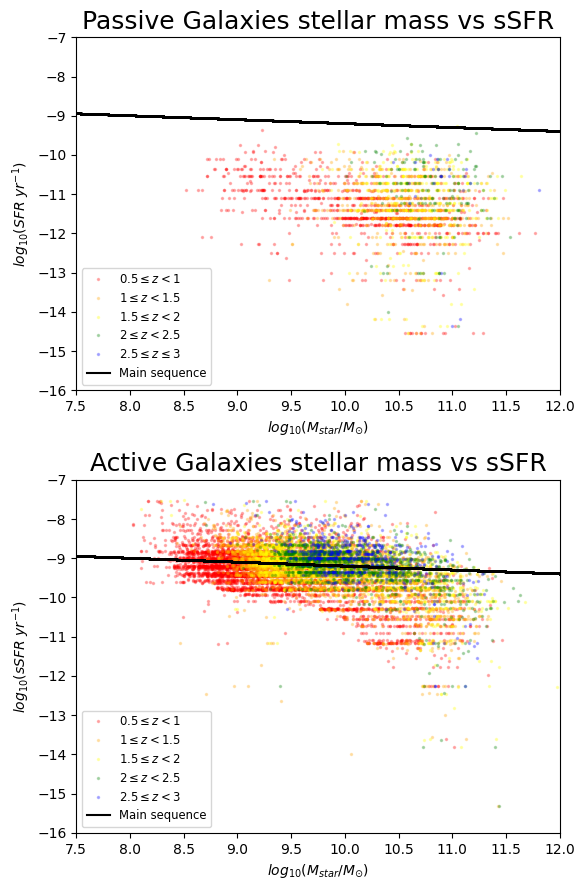

In [ ]:
# prompt: sublot figure 1x3 of 1. passive stellar mass vs SFR, 2. active stellar mass vs SFR and 3. the two of them together, all at different redshift bins

# All galaxies stellar mass vs SFR
fig, axes = mp.subplots(2, 1, figsize=(7, 9)) # Adjusted figure size for better readability

# Plot 1: Passive Galaxies
ax1 = axes[0]
ax1.plot(UVJ_lmass_1, np.array(UVJ_lsfr_1)-np.array(UVJ_lmass_1), ".", alpha=0.25, ms=3, color="red", label='$0.5 \leq z < 1$')
ax1.plot(UVJ_lmass_2, np.array(UVJ_lsfr_2)-np.array(UVJ_lmass_2), ".", alpha=0.25, ms=3, color="orange", label='$1 \leq z < 1.5$')
ax1.plot(UVJ_lmass_3, np.array(UVJ_lsfr_3)-np.array(UVJ_lmass_3), ".", alpha=0.25, ms=3, color="yellow", label='$1.5 \leq z < 2$')
ax1.plot(UVJ_lmass_4, np.array(UVJ_lsfr_4)-np.array(UVJ_lmass_4), ".", alpha=0.25, ms=3, color="green", label='$2 \leq z < 2.5$')
ax1.plot(UVJ_lmass_5, np.array(UVJ_lsfr_5)-np.array(UVJ_lmass_5), ".", alpha=0.25, ms=3, color="blue", label='$2.5 \leq z \leq 3$')
ax1.plot(x,y2, color='black', ms=0.2, label='Main sequence')
ax1.set_xlabel(r'$log_{10}(M_{star}/M_{\odot})$')
ax1.set_ylabel(r'$log_{10}(SFR\ yr^{-1})$')
ax1.set_title('Passive Galaxies stellar mass vs sSFR', fontsize=18)
ax1.set_xlim(7.5,12) # Set x-axis limits for consistency
ax1.set_ylim(-16, -7)   # Set y-axis limits for consistency
ax1.legend(fontsize='small')

# Plot 2: Active Galaxies
ax2 = axes[1]
ax2.plot(mass_a1, np.array(lsfr_a1)-np.array(mass_a1), ".", alpha=0.25, ms=3, color="red", label='$0.5 \leq z < 1$')
ax2.plot(mass_a2, np.array(lsfr_a2)-np.array(mass_a2), ".", alpha=0.25, ms=3, color="orange", label='$1 \leq z < 1.5$')
ax2.plot(mass_a3, np.array(lsfr_a3)-np.array(mass_a3), ".", alpha=0.25, ms=3, color="yellow", label='$1.5 \leq z < 2$')
ax2.plot(mass_a4, np.array(lsfr_a4)-np.array(mass_a4), ".", alpha=0.25, ms=3, color="green", label='$2 \leq z < 2.5$')
ax2.plot(mass_a5, np.array(lsfr_a5)-np.array(mass_a5), ".", alpha=0.25, ms=3, color="blue", label='$2.5 \leq z < 3$')
ax2.plot(x,y2, color='black', ms=0.2, label='Main sequence')
ax2.set_xlabel(r'$log_{10}(M_{star}/M_{\odot})$')
ax2.set_ylabel(r'$log_{10}(sSFR\ yr^{-1})$')
ax2.set_title('Active Galaxies stellar mass vs sSFR', fontsize=18)
ax2.set_xlim(7.5,12) # Set x-axis limits for consistency
ax2.set_ylim(-16, -7)   # Set y-axis limits for consistency
ax2.legend(fontsize='small')


'''# Plot 3: Passive and Active Galaxies together
ax3 = axes[2]
# Plot Passive Galaxies
ax3.plot(UVJ_lmass_1, UVJ_lsfr_1, ".", alpha=0.5, ms=3, color="red", label='Passive $0.5 \leq z < 1$')
ax3.plot(UVJ_lmass_2, UVJ_lsfr_2, ".", alpha=0.5, ms=3, color="orange", label='Passive $1 \leq z < 1.5$')
ax3.plot(UVJ_lmass_3, UVJ_lsfr_3, ".", alpha=0.5, ms=3, color="yellow", label='Passive $1.5 \leq z < 2$')
ax3.plot(UVJ_lmass_4, UVJ_lsfr_4, ".", alpha=0.5, ms=3, color="green", label='Passive $2 \leq z < 2.5$')
ax3.plot(UVJ_lmass_5, UVJ_lsfr_5, ".", alpha=0.5, ms=3, color="blue", label='Passive $2.5 \leq z \leq 3$')

# Plot Active Galaxies with slightly different colors or markers if desired
ax3.plot(mass_a1, lsfr_a1, "x", alpha=0.5, ms=3, color="red", label='Active $0.5 \leq z < 1$')
ax3.plot(mass_a2, lsfr_a2, "x", alpha=0.5, ms=3, color="orange", label='Active $1 \leq z < 1.5$')
ax3.plot(mass_a3, lsfr_a3, "x", alpha=0.5, ms=3, color="yellow", label='Active $1.5 \leq z < 2$')
ax3.plot(mass_a4, lsfr_a4, "x", alpha=0.5, ms=3, color="green", label='Active $2 \leq z < 2.5$')
ax3.plot(mass_a5, lsfr_a5, "x", alpha=0.5, ms=3, color="blue", label='Active $2.5 \leq z < 3$')

ax3.plot(x,y, color='black', ms=0.2, label='Main sequence')
ax3.set_xlabel(r'$log_{10}(M_{star}/M_{\odot})$')
ax3.set_ylabel(r'$log_{10}(SFR/M_{\odot}yr^{-1})$')
ax3.set_title('Passive and Active Galaxies stellar mass vs SFR')
ax3.set_xlim(8,12) # Set x-axis limits for consistency
ax3.set_ylim(-4, 3)   # Set y-axis limits for consistency
# Adjust legend size or placement if it overlaps
#ax3.legend(fontsize='small', loc='lower center', ncol=2)'''


mp.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend

#fig.savefig('10_passive_active_SFR.png')
#files.download('10_passive_active_SFR.png')

mp.show()

/tmp/ipython-input-31-2480257119.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [axes[i,j].legend() for i in range(3) for j in range(2)]


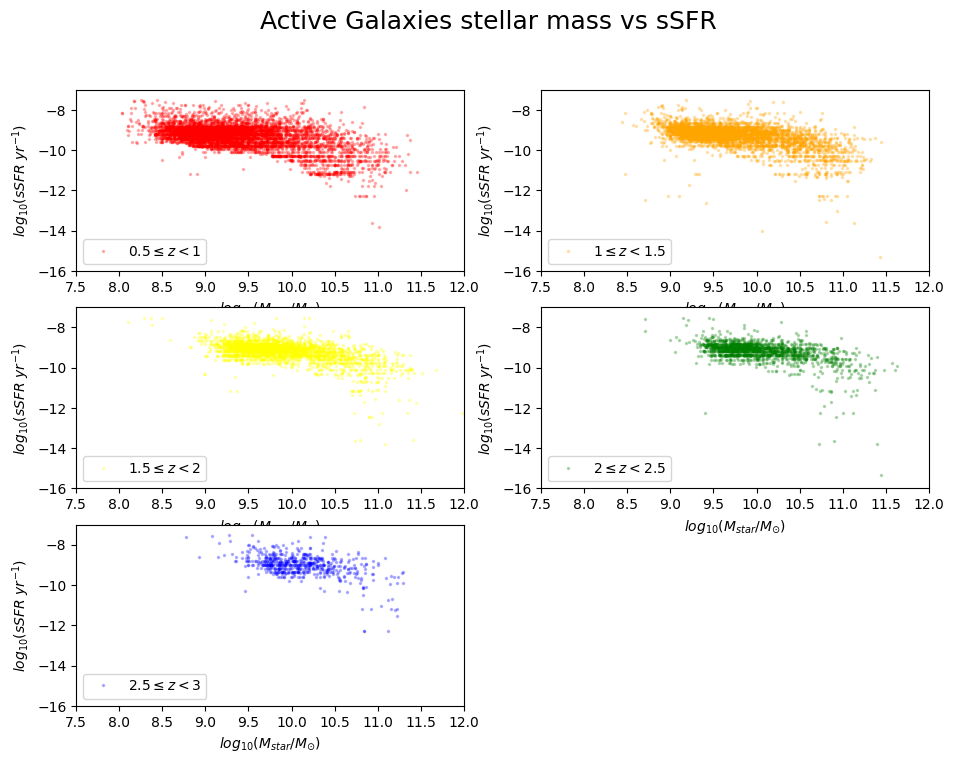

In [ ]:
fig, axes = mp.subplots(3,2, figsize=(11, 8))
ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]
ax5 = axes[2,0]
ax6 = axes[2,1]

ax1.plot(mass_a1, np.array(lsfr_a1)-np.array(mass_a1), ".", alpha=0.25, ms=3, color="red", label='$0.5 \leq z < 1$')
ax2.plot(mass_a2, np.array(lsfr_a2)-np.array(mass_a2), ".", alpha=0.25, ms=3, color="orange", label='$1 \leq z < 1.5$')
ax3.plot(mass_a3, np.array(lsfr_a3)-np.array(mass_a3), ".", alpha=0.25, ms=3, color="yellow", label='$1.5 \leq z < 2$')
ax4.plot(mass_a4, np.array(lsfr_a4)-np.array(mass_a4), ".", alpha=0.25, ms=3, color="green", label='$2 \leq z < 2.5$')
ax5.plot(mass_a5, np.array(lsfr_a5)-np.array(mass_a5), ".", alpha=0.25, ms=3, color="blue", label='$2.5 \leq z < 3$')
fig.delaxes(axes[2,1])

[axes[i,j].set_xlim(7.5,12) for i in range(3) for j in range(2)] # Set x-axis limits for consistency
[axes[i,j].set_ylim(-16, -7) for i in range(3) for j in range(2)]    # Set y-axis limits for consistency
#[axes[i,j].plot(x,y2, color='black', ms=0.2, label='Main sequence') for i in range(3) for j in range(2)]
[axes[i,j].set_xlabel(r'$log_{10}(M_{star}/M_{\odot})$') for i in range(3) for j in range(2)]
[axes[i,j].set_ylabel(r'$log_{10}(sSFR\ yr^{-1})$') for i in range(3) for j in range(2)]
[axes[i,j].legend() for i in range(3) for j in range(2)]

fig.suptitle('Active Galaxies stellar mass vs sSFR', fontsize=18)
mp.show()

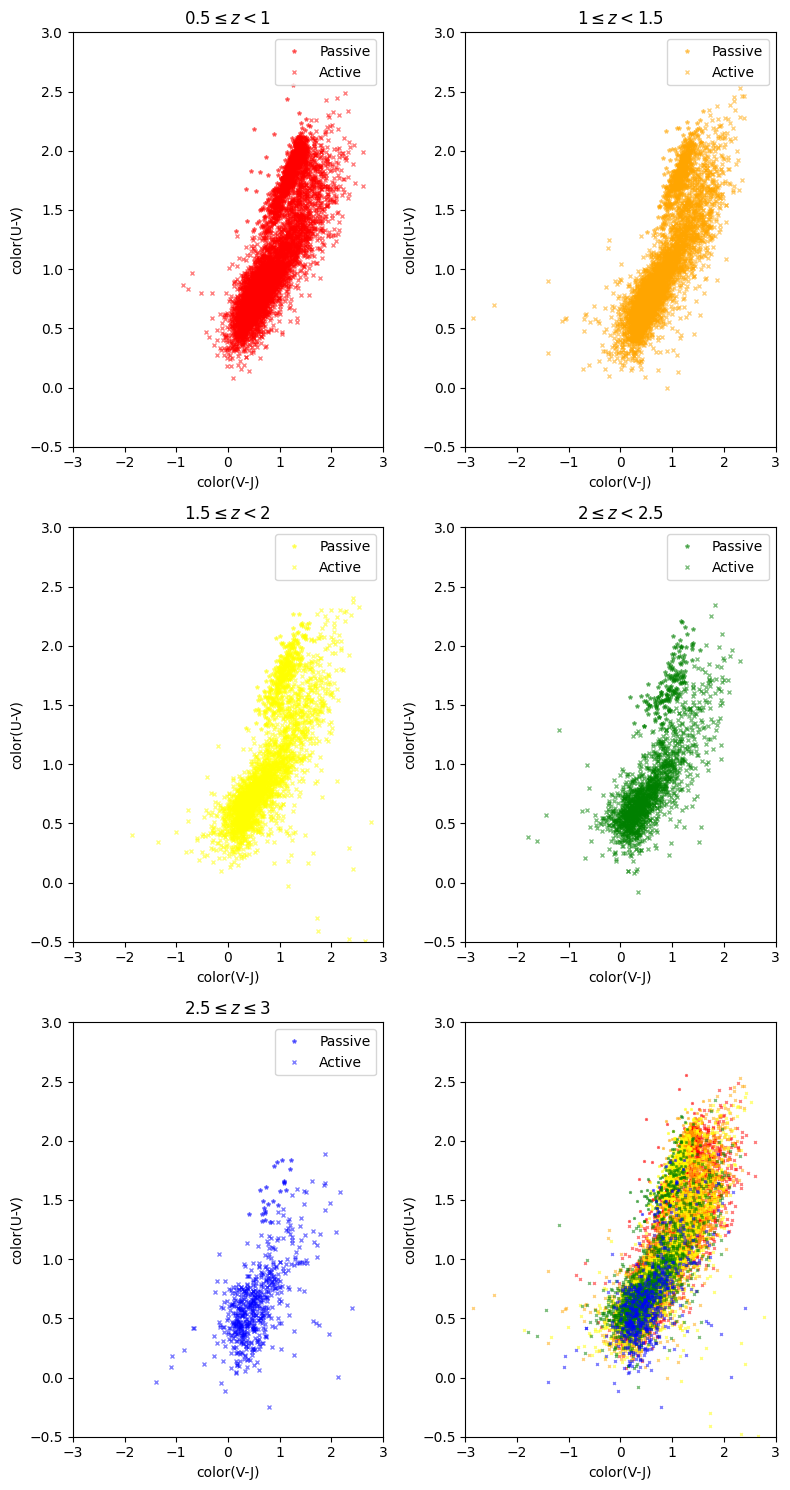

In [ ]:
# prompt: plot the V-J vs U-V relation at different redshift  for passive and active galaxies together in a subplots figure 2x2 deviding the redshift bins

# Plot V-J vs U-V for passive and active galaxies together at different redshift bins
fig, axes = mp.subplots(3, 2, figsize=(8, 15))

# Redshift bin 0.5 <= z < 1
ax0 = axes[0, 0]
ax0.plot(UVJ_VmJ_1, UVJ_UmV_1, "*", alpha=0.5, ms=3, color='red', label='Passive')
ax0.plot(VmJ_a1, UmV_a1, "x", alpha=0.5, ms=3, color='red', label='Active')
ax0.set_xlabel('color(V-J)')
ax0.set_ylabel('color(U-V)')
ax0.set_title('$0.5 \leq z < 1$')
ax0.legend()
ax0.set_xlim(-3, 3)
ax0.set_ylim(-0.5, 3)


# Redshift bin 1 <= z < 1.5
ax1 = axes[0, 1]
ax1.plot(UVJ_VmJ_2, UVJ_UmV_2, "*", alpha=0.5, ms=3, color='orange', label='Passive')
ax1.plot(VmJ_a2, UmV_a2, "x", alpha=0.5, ms=3, color='orange', label='Active')
ax1.set_xlabel('color(V-J)')
ax1.set_ylabel('color(U-V)')
ax1.set_title('$1 \leq z < 1.5$')
ax1.legend()
ax1.set_xlim(-3, 3)
ax1.set_ylim(-0.5, 3)

# Redshift bin 1.5 <= z < 2
ax2 = axes[1, 0]
ax2.plot(UVJ_VmJ_3, UVJ_UmV_3, "*", alpha=0.5, ms=3, color='yellow', label='Passive')
ax2.plot(VmJ_a3, UmV_a3, "x", alpha=0.5, ms=3, color='yellow', label='Active')
ax2.set_xlabel('color(V-J)')
ax2.set_ylabel('color(U-V)')
ax2.set_title('$1.5 \leq z < 2$')
ax2.legend()
ax2.set_xlim(-3, 3)
ax2.set_ylim(-0.5, 3)

# Redshift bin 2 <= z < 2.5
ax3 = axes[1, 1]
ax3.plot(UVJ_VmJ_4, UVJ_UmV_4, "*", alpha=0.5, ms=3, color='green', label='Passive')
ax3.plot(VmJ_a4, UmV_a4, "x", alpha=0.5, ms=3, color='green', label='Active')
ax3.set_xlabel('color(V-J)')
ax3.set_ylabel('color(U-V)')
ax3.set_title('$2 \leq z < 2.5$')
ax3.legend()
ax3.set_xlim(-3, 3)
ax3.set_ylim(-0.5, 3)

# Redshift bin 2.5 <= z <= 3
ax4 = axes[2, 0]
ax4.plot(UVJ_VmJ_5, UVJ_UmV_5, "*", alpha=0.5, ms=3, color='blue', label='Passive')
ax4.plot(VmJ_a5, UmV_a5, "x", alpha=0.5, ms=3, color='blue', label='Active')
ax4.set_xlabel('color(V-J)')
ax4.set_ylabel('color(U-V)')
ax4.set_title('$2.5 \leq z \leq 3$')
ax4.legend()
ax4.set_xlim(-3, 3)
ax4.set_ylim(-0.5, 3)

# Combined plot for all redshift bins
ax5 = axes[2, 1]
ax5.plot(UVJ_VmJ_1, UVJ_UmV_1, "*", alpha=0.5, ms=2, color='red', label='Passive $0.5 \leq z < 1$')
ax5.plot(VmJ_a1, UmV_a1, "x", alpha=0.5, ms=2, color='red', label='Active $0.5 \leq z < 1$')
ax5.plot(UVJ_VmJ_2, UVJ_UmV_2, "*", alpha=0.5, ms=2, color='orange', label='Passive $1 \leq z < 1.5$')
ax5.plot(VmJ_a2, UmV_a2, "x", alpha=0.5, ms=2, color='orange', label='Active $1 \leq z < 1.5$')
ax5.plot(UVJ_VmJ_3, UVJ_UmV_3, "*", alpha=0.5, ms=2, color='yellow', label='Passive $1.5 \leq z < 2$')
ax5.plot(VmJ_a3, UmV_a3, "x", alpha=0.5, ms=2, color='yellow', label='Active $1.5 \leq z < 2$')
ax5.plot(UVJ_VmJ_4, UVJ_UmV_4, "*", alpha=0.5, ms=2, color='green', label='Passive $2 \leq z < 2.5$')
ax5.plot(VmJ_a4, UmV_a4, "x", alpha=0.5, ms=2, color='green', label='Active $2 \leq z < 2.5$')
ax5.plot(UVJ_VmJ_5, UVJ_UmV_5, "*", alpha=0.5, ms=2, color='blue', label='Passive $2.5 \leq z \leq 3$')
ax5.plot(VmJ_a5, UmV_a5, "x", alpha=0.5, ms=2, color='blue', label='Active $2.5 \leq z \leq 3$')
ax5.set_xlabel('color(V-J)')
ax5.set_ylabel('color(U-V)')
#ax5.set_title('Passive and Active Galaxies V-J vs U-V')
#ax5.legend(loc='lower right', ncol=2)
ax5.set_xlim(-3, 3)
ax5.set_ylim(-0.5, 3)


mp.tight_layout()

#fig.savefig('7_UVJ_passive_active_zbins.png')
#files.download('7_UVJ_passive_active_zbins.png')

mp.show()

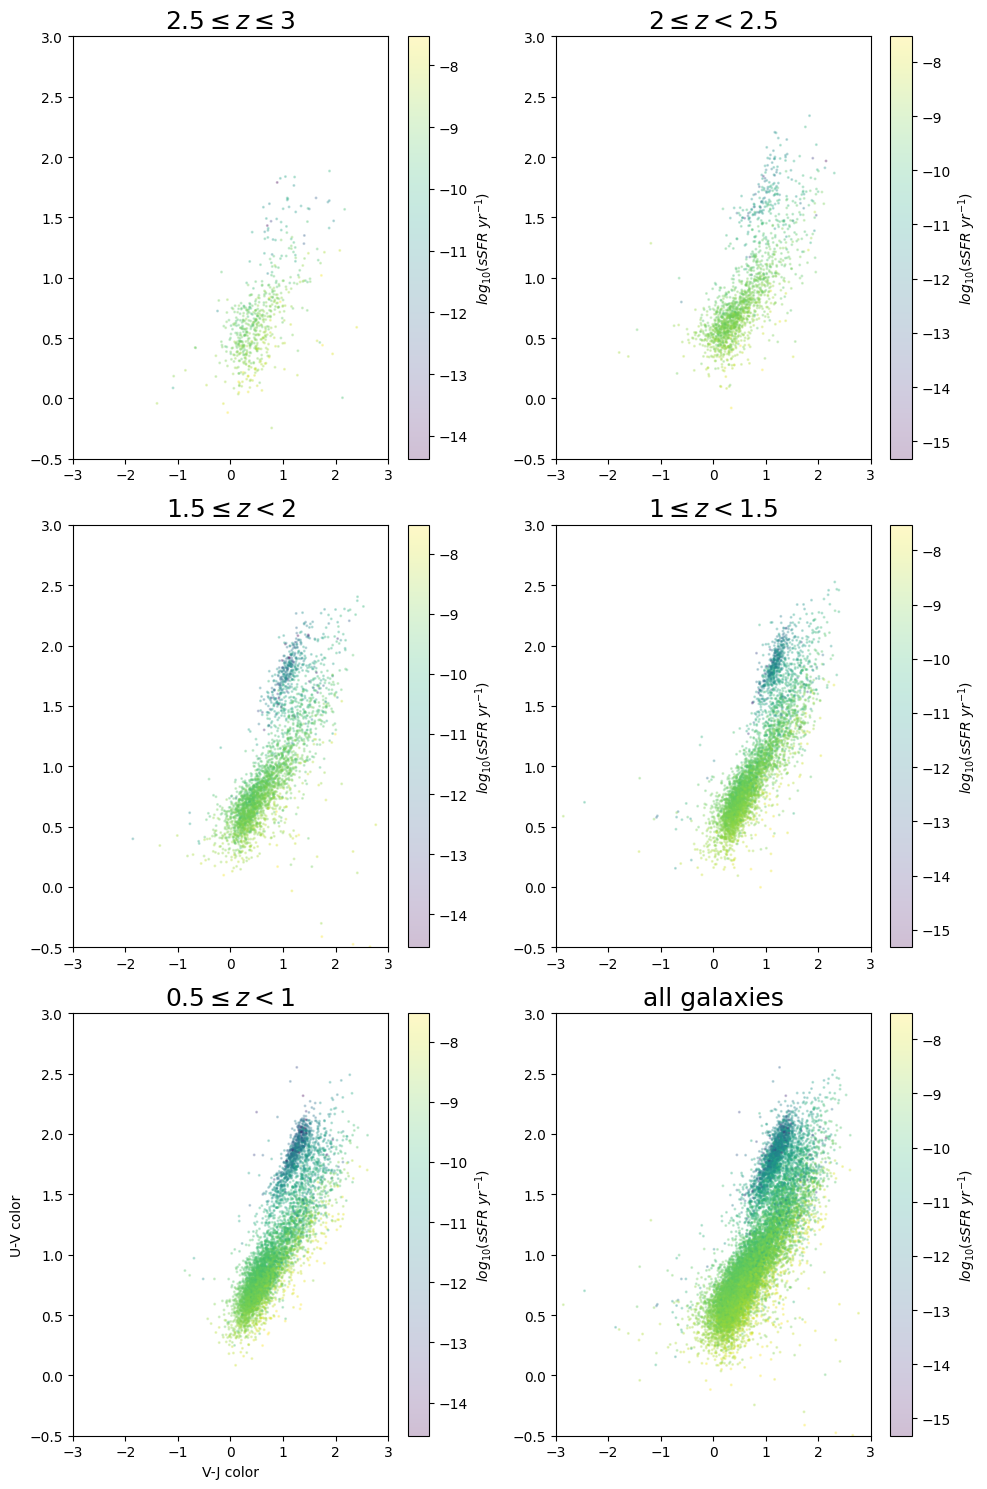

In [ ]:
# Scatter plots for all galaxies divided by redshift bins, with sSFR as color

fig, axes = mp.subplots(3, 2, figsize=(10, 15))

# Redshift bin 0.5 <= z < 1
ax0 = axes[2, 0]
scatter0 = ax0.scatter(VmJtot_np[(0.5 <= redshiftV_np) & (redshiftV_np < 1)],
                       UmVtot_np[(0.5 <= redshiftV_np) & (redshiftV_np < 1)],
                       c=lsfrtot_np[(0.5 <= redshiftV_np) & (redshiftV_np < 1)]-lmasstot_np[(0.5 <= redshiftV_np) & (redshiftV_np < 1)],
                       marker='.', alpha=0.25, s=5, cmap='viridis')
fig.colorbar(scatter0, ax=ax0, label=r'$log_{10}(sSFR\ yr^{-1})$')
ax0.set_xlabel('V-J color')
ax0.set_ylabel('U-V color')
ax0.set_title('$0.5 \leq z < 1$', fontsize=18)
ax0.set_xlim(-3, 3)
ax0.set_ylim(-0.5, 3)


# Redshift bin 1 <= z < 1.5
ax1 = axes[1, 1]
scatter1 = ax1.scatter(VmJtot_np[(1 <= redshiftV_np) & (redshiftV_np < 1.5)],
                       UmVtot_np[(1 <= redshiftV_np) & (redshiftV_np < 1.5)],
                       c=lsfrtot_np[(1 <= redshiftV_np) & (redshiftV_np < 1.5)]-lmasstot_np[(1 <= redshiftV_np) & (redshiftV_np < 1.5)],
                       marker='.', alpha=0.25, s=5, cmap='viridis')
fig.colorbar(scatter1, ax=ax1, label=r'$log_{10}(sSFR\ yr^{-1})$')
ax1.set_xlabel('V-J color')
ax1.set_ylabel('U-V color')
ax1.set_title('$1 \leq z < 1.5$', fontsize=18)
ax1.set_xlim(-3, 3)
ax1.set_ylim(-0.5, 3)

# Redshift bin 1.5 <= z < 2
ax2 = axes[1, 0]
scatter2 = ax2.scatter(VmJtot_np[(1.5 <= redshiftV_np) & (redshiftV_np < 2)],
                       UmVtot_np[(1.5 <= redshiftV_np) & (redshiftV_np < 2)],
                       c=lsfrtot_np[(1.5 <= redshiftV_np) & (redshiftV_np < 2)]-lmasstot_np[(1.5 <= redshiftV_np) & (redshiftV_np < 2)],
                       marker='.', alpha=0.25, s=5, cmap='viridis')
fig.colorbar(scatter2, ax=ax2, label=r'$log_{10}(sSFR\ yr^{-1})$')
ax2.set_xlabel('V-J color')
ax2.set_ylabel('U-V color')
ax2.set_title('$1.5 \leq z < 2$', fontsize=18)
ax2.set_xlim(-3, 3)
ax2.set_ylim(-0.5, 3)

# Redshift bin 2 <= z < 2.5
ax3 = axes[0, 1]
scatter3 = ax3.scatter(VmJtot_np[(2 <= redshiftV_np) & (redshiftV_np < 2.5)],
                       UmVtot_np[(2 <= redshiftV_np) & (redshiftV_np < 2.5)],
                       c=lsfrtot_np[(2 <= redshiftV_np) & (redshiftV_np < 2.5)]-lmasstot_np[(2 <= redshiftV_np) & (redshiftV_np < 2.5)],
                       marker='.', alpha=0.25, s=5, cmap='viridis')
fig.colorbar(scatter3, ax=ax3, label=r'$log_{10}(sSFR\ yr^{-1})$')
ax3.set_xlabel('V-J color')
ax3.set_ylabel('U-V color')
ax3.set_title('$2 \leq z < 2.5$', fontsize=18)
ax3.set_xlim(-3, 3)
ax3.set_ylim(-0.5, 3)

# Redshift bin 2.5 <= z <= 3
ax4 = axes[0, 0]
scatter4 = ax4.scatter(VmJtot_np[(2.5 <= redshiftV_np) & (redshiftV_np <= 3)],
                       UmVtot_np[(2.5 <= redshiftV_np) & (redshiftV_np <= 3)],
                       c=lsfrtot_np[(2.5 <= redshiftV_np) & (redshiftV_np <= 3)]-lmasstot_np[(2.5 <= redshiftV_np) & (redshiftV_np <= 3)],
                       marker='.', alpha=0.25, s=5, cmap='viridis')
fig.colorbar(scatter4, ax=ax4, label=r'$log_{10}(sSFR\ yr^{-1})$')
ax4.set_xlabel('V-J color')
ax4.set_ylabel('U-V color')
ax4.set_title('$2.5 \leq z \leq 3$', fontsize=18)
ax4.set_xlim(-3, 3)
ax4.set_ylim(-0.5, 3)

ax5 = axes[2,1]
scatter5 = ax5.scatter(VmJtot_np, UmVtot_np, c=lsfrtot_np-lmasstot_np, marker='.', alpha=0.25, s=5, cmap='viridis')
fig.colorbar(scatter5, ax=ax5, label=r'$log_{10}(sSFR\ yr^{-1})$')
ax5.set_xlabel('V-J color')
ax5.set_ylabel('U-V color')
ax5.set_title('all galaxies', fontsize=18)
ax5.set_xlim(-3, 3)
ax5.set_ylim(-0.5, 3)

mp.tight_layout()

#fig.savefig('8_MvsSFR_sSFR_zbins.png')
#files.download('8_MvsSFR_sSFR_zbins.png')

mp.show()

In [ ]:

lmasstot_1 = []
lmasstot_2 = []
lmasstot_3 = []
lmasstot_4 = []
lmasstot_5 = []
redshift_1 = []
redshift_2 = []
redshift_3 = []
redshift_4 = []
redshift_5 = []

for i in range(len(redshiftV)):
  #if lmass[i] >= 7 and lsfr[i] >= -4 and -4 < VmJ[i] < 4:
  if 0.5 <= redshiftV[i] < 1:
    lmasstot_1.append(lmasstot[i])
    redshift_1.append(redshiftV[i])
  if 1 <= redshiftV[i] < 1.5:
    lmasstot_2.append(lmasstot[i])
    redshift_2.append(redshiftV[i])
  if 1.5 <= redshiftV[i] < 2:
    lmasstot_3.append(lmasstot[i])
    redshift_3.append(redshiftV[i])
  if 2 <= redshiftV[i] < 2.5:
    lmasstot_4.append(lmasstot[i])
    redshift_4.append(redshiftV[i])
  if 2.5 <= redshiftV[i] <= 3:
    lmasstot_5.append(lmasstot[i])
    redshift_5.append(redshiftV[i])

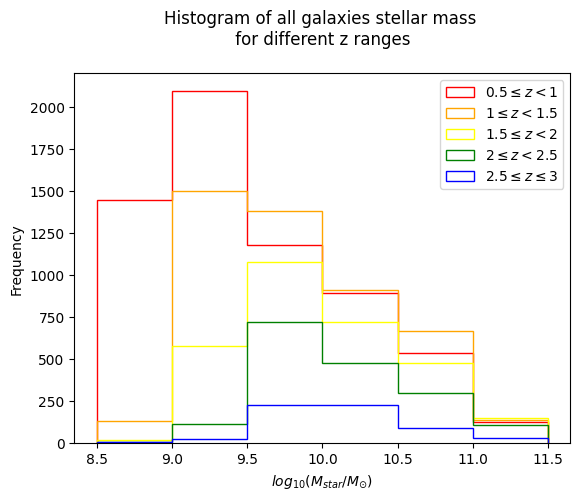

In [ ]:
q1_1, q1_2, q1_3 = mp.hist(lmasstot_1, bins=6, range=(8.5, 11.5), label='$0.5 \leq z < 1$', histtype='step', color='red')
q2_1, q2_2, q2_3 = mp.hist(lmasstot_2, bins=6, range=(8.5, 11.5), label='$1 \leq z < 1.5$', histtype='step', color='orange')
q3_1, q3_2, q3_3 = mp.hist(lmasstot_3, bins=6, range=(8.5, 11.5), label='$1.5 \leq z < 2$', histtype='step', color='yellow')
q4_1, q4_2, q4_3 = mp.hist(lmasstot_4, bins=6, range=(8.5, 11.5), label='$2 \leq z < 2.5$', histtype='step', color='green')
q5_1, q5_2, q5_3 = mp.hist(lmasstot_5, bins=6, range=(8.5, 11.5), label='$2.5 \leq z \leq 3$', histtype='step', color='blue')

mp.xlabel('$log_{10}(M_{star}/M_{\odot})$')
mp.ylabel('Frequency')
mp.title('Histogram of all galaxies stellar mass \n for different z ranges \n')
mp.legend()
mp.show()

## Fraction of passive and active galaxies

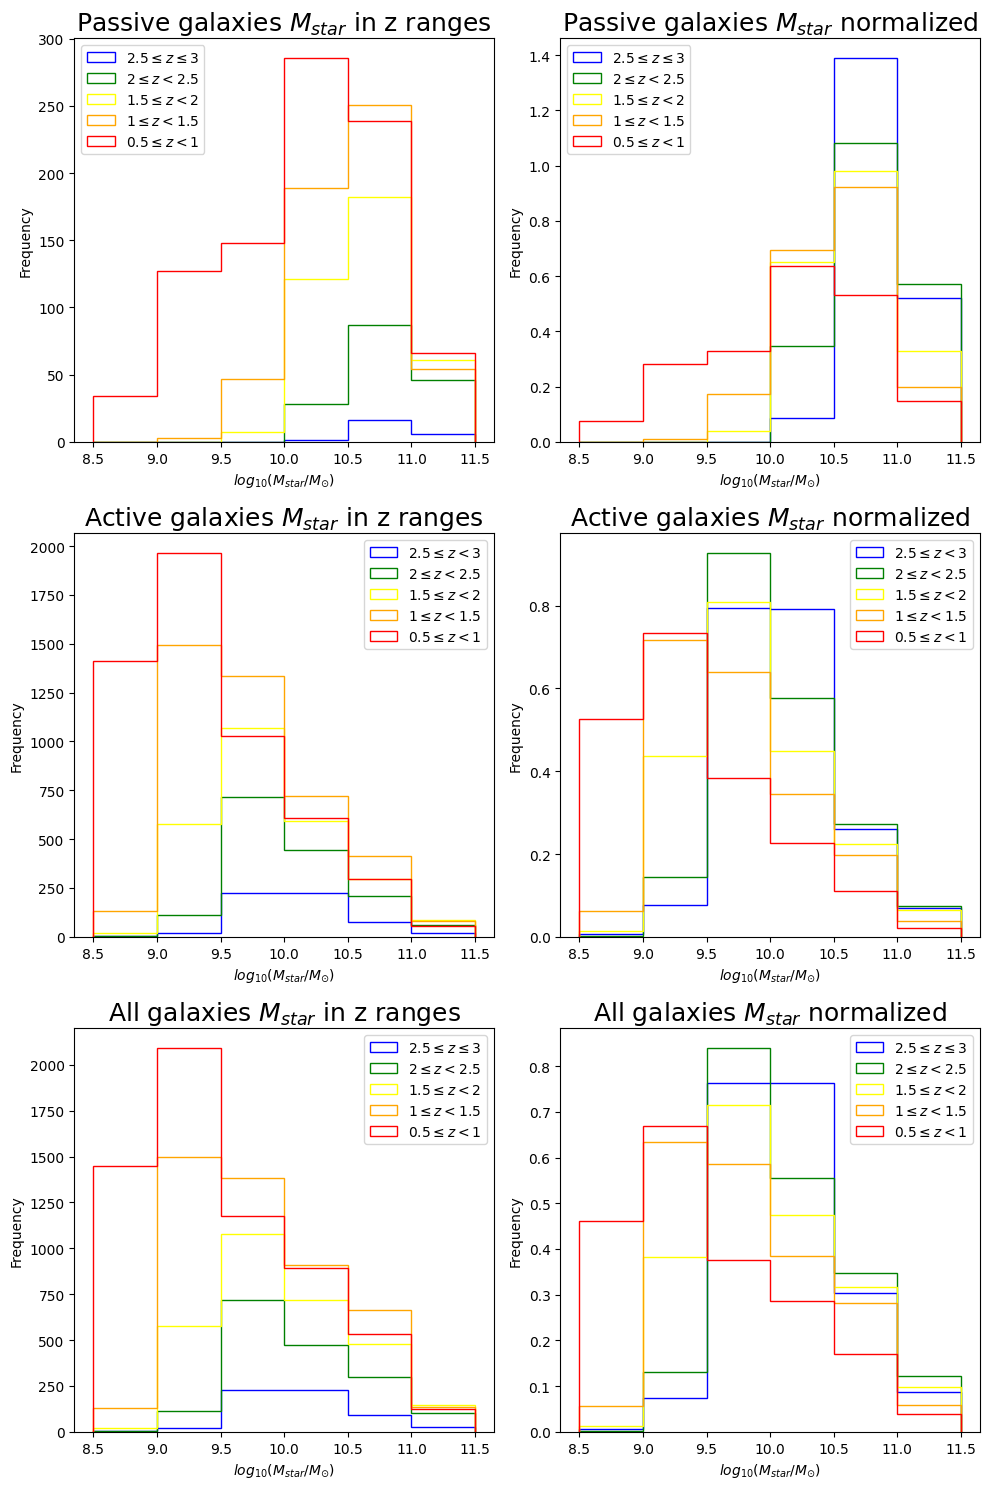

In [ ]:
## prompt: put in a subplots figure all the tree histogram of stellar mass at different z ranges for passive, active and all galaxies did above.

fig, axes = mp.subplots(3,2, figsize=(10, 15))

# Passive Galaxies Histogram
axes[0,0].hist([UVJ_lmass_1, UVJ_lmass_2, UVJ_lmass_3, UVJ_lmass_4, UVJ_lmass_5],
             bins=6, range=(8.5, 11.5),
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z \leq 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_xlabel('$log_{10}(M_{star}/M_{\odot})$')
axes[0,0].set_title('Passive galaxies $M_{star}$ in z ranges', fontsize=18)
axes[0,0].legend()

axes[0,1].hist([UVJ_lmass_1, UVJ_lmass_2, UVJ_lmass_3, UVJ_lmass_4, UVJ_lmass_5],
             bins=6, range=(8.5, 11.5), density=True,
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z \leq 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_xlabel('$log_{10}(M_{star}/M_{\odot})$')
axes[0,1].set_title('Passive galaxies $M_{star}$ normalized', fontsize=18)
axes[0,1].legend()

# Active Galaxies Histogram
axes[1,0].hist([mass_a1, mass_a2, mass_a3, mass_a4, mass_a5],
             bins=6, range=(8.5, 11.5),
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z < 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_xlabel('$log_{10}(M_{star}/M_{\odot})$')
axes[1,0].set_title('Active galaxies $M_{star}$ in z ranges', fontsize=18)
axes[1,0].legend()

axes[1,1].hist([mass_a1, mass_a2, mass_a3, mass_a4, mass_a5],
             bins=6, range=(8.5, 11.5), density=True,
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z < 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_xlabel('$log_{10}(M_{star}/M_{\odot})$')
axes[1,1].set_title('Active galaxies $M_{star}$ normalized', fontsize=18)
axes[1,1].legend()

# All Galaxies Histogram
axes[2,0].hist([lmasstot_1, lmasstot_2, lmasstot_3, lmasstot_4, lmasstot_5],
             bins=6, range=(8.5, 11.5),
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z \leq 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[2,0].set_xlabel('$log_{10}(M_{star}/M_{\odot})$')
axes[2,0].set_ylabel('Frequency')
axes[2,0].set_title('All galaxies $M_{star}$ in z ranges', fontsize=18)
axes[2,0].legend()

axes[2,1].hist([lmasstot_1, lmasstot_2, lmasstot_3, lmasstot_4, lmasstot_5],
             bins=6, range=(8.5, 11.5), density=True,
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z \leq 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[2,1].set_xlabel('$log_{10}(M_{star}/M_{\odot})$')
axes[2,1].set_ylabel('Frequency')
axes[2,1].set_title('All galaxies $M_{star}$ normalized', fontsize=18)
axes[2,1].legend()

mp.tight_layout()

#fig.savefig('6_histogramsNORM.png')
#files.download('6_histogramsNORM.png')

mp.show()

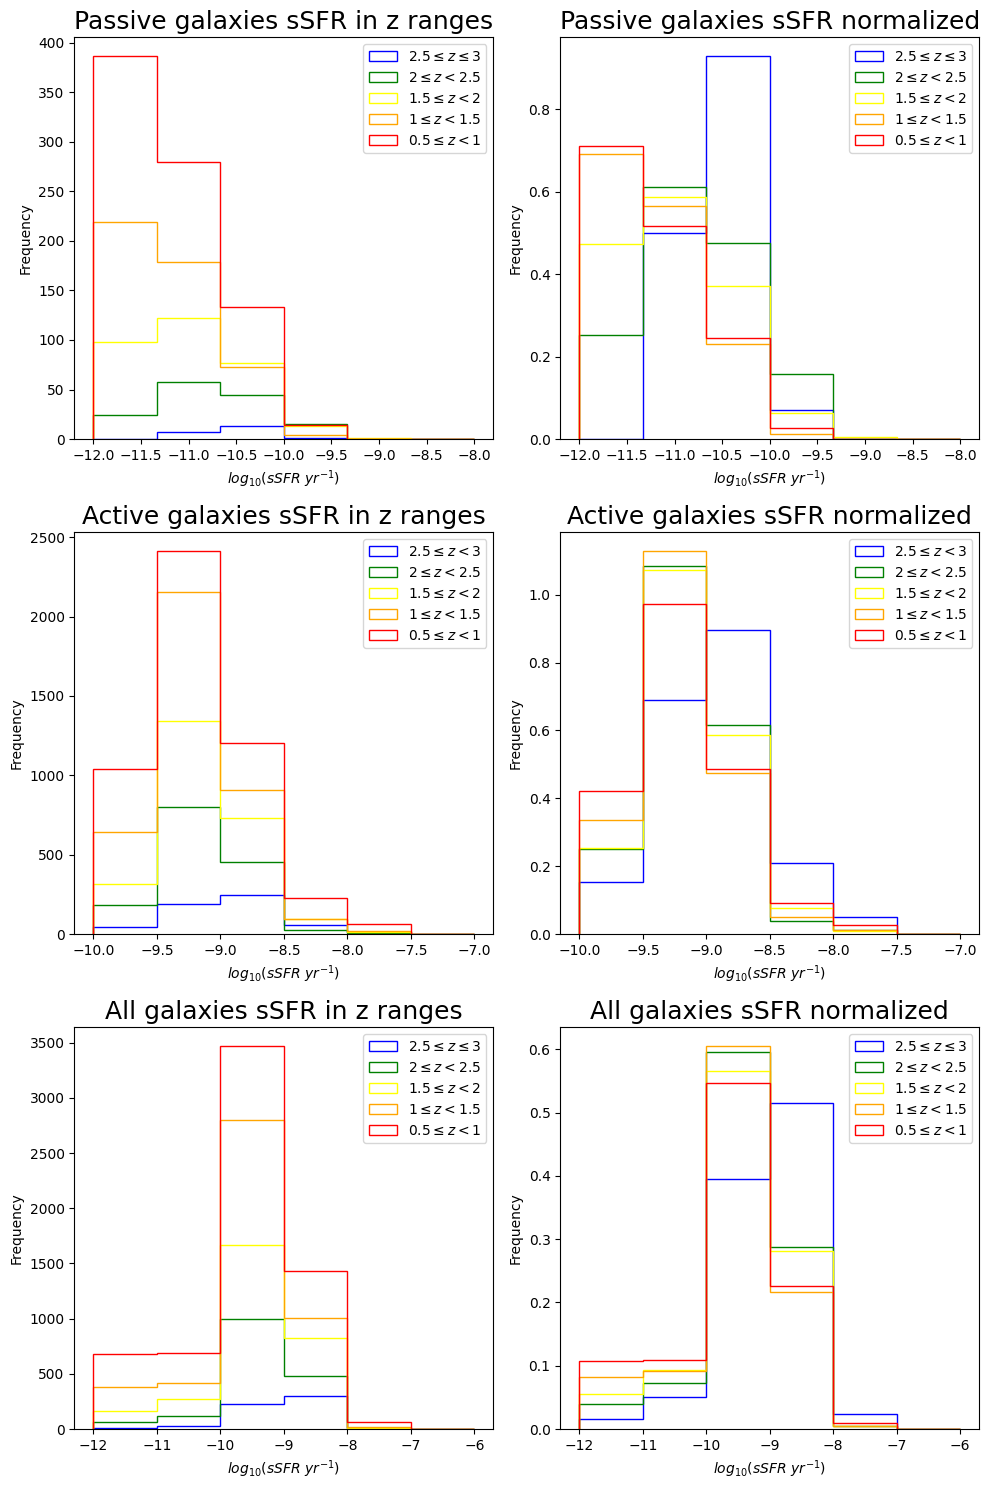

In [ ]:
# prompt: same histogram plots as in cell 26 but with log10(SFR)-log10(Mass) for passive, active and all galaxies respectively

import numpy as np
# Calculate log10(SFR/Mass) for passive galaxies
log_sfr_mass_p1 = np.array(UVJ_lsfr_1) - np.array(UVJ_lmass_1)
log_sfr_mass_p2 = np.array(UVJ_lsfr_2) - np.array(UVJ_lmass_2)
log_sfr_mass_p3 = np.array(UVJ_lsfr_3) - np.array(UVJ_lmass_3)
log_sfr_mass_p4 = np.array(UVJ_lsfr_4) - np.array(UVJ_lmass_4)
log_sfr_mass_p5 = np.array(UVJ_lsfr_5) - np.array(UVJ_lmass_5)

# Calculate log10(SFR/Mass) for active galaxies
log_sfr_mass_a1 = lsfr_a1 - mass_a1
log_sfr_mass_a2 = lsfr_a2 - mass_a2
log_sfr_mass_a3 = lsfr_a3 - mass_a3
log_sfr_mass_a4 = lsfr_a4 - mass_a4
log_sfr_mass_a5 = lsfr_a5 - mass_a5

# Calculate log10(SFR/Mass) for all galaxies
log_sfr_mass_tot1 = np.array(lsfrtot_np[(0.5 <= redshiftV_np) & (redshiftV_np < 1)]) - np.array(lmasstot_np[(0.5 <= redshiftV_np) & (redshiftV_np < 1)])
log_sfr_mass_tot2 = np.array(lsfrtot_np[(1 <= redshiftV_np) & (redshiftV_np < 1.5)]) - np.array(lmasstot_np[(1 <= redshiftV_np) & (redshiftV_np < 1.5)])
log_sfr_mass_tot3 = np.array(lsfrtot_np[(1.5 <= redshiftV_np) & (redshiftV_np < 2)]) - np.array(lmasstot_np[(1.5 <= redshiftV_np) & (redshiftV_np < 2)])
log_sfr_mass_tot4 = np.array(lsfrtot_np[(2 <= redshiftV_np) & (redshiftV_np < 2.5)]) - np.array(lmasstot_np[(2 <= redshiftV_np) & (redshiftV_np < 2.5)])
log_sfr_mass_tot5 = np.array(lsfrtot_np[(2.5 <= redshiftV_np) & (redshiftV_np <= 3)]) - np.array(lmasstot_np[(2.5 <= redshiftV_np) & (redshiftV_np <= 3)])


fig, axes = mp.subplots(3, 2, figsize=(10, 15))

# Passive Galaxies Histogram of log10(SFR)-log10(Mass)
axes[0,0].hist([log_sfr_mass_p1, log_sfr_mass_p2, log_sfr_mass_p3, log_sfr_mass_p4, log_sfr_mass_p5],
             bins=6, range=(-12, -8), # Adjust range and bins as needed
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z \leq 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_xlabel('$log_{10}(sSFR\ yr^{-1})$')
axes[0,0].set_title('Passive galaxies sSFR in z ranges', fontsize=18)
axes[0,0].legend()

axes[0,1].hist([log_sfr_mass_p1, log_sfr_mass_p2, log_sfr_mass_p3, log_sfr_mass_p4, log_sfr_mass_p5],
             bins=6, range=(-12, -8), # Adjust range and bins as needed
             density=True,
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z \leq 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_xlabel('$log_{10}(sSFR\ yr^{-1})$')
axes[0,1].set_title('Passive galaxies sSFR normalized', fontsize=18)
axes[0,1].legend()

# Active Galaxies Histogram of log10(SFR)-log10(Mass)
axes[1,0].hist([log_sfr_mass_a1, log_sfr_mass_a2, log_sfr_mass_a3, log_sfr_mass_a4, log_sfr_mass_a5],
             bins=6, range=(-10, -7), # Adjust range and bins as needed
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z < 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_xlabel('$log_{10}(sSFR\ yr^{-1})$')
axes[1,0].set_title('Active galaxies sSFR in z ranges', fontsize=18)
axes[1,0].legend()

axes[1,1].hist([log_sfr_mass_a1, log_sfr_mass_a2, log_sfr_mass_a3, log_sfr_mass_a4, log_sfr_mass_a5],
             bins=6, range=(-10, -7), density=True,
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z < 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_xlabel('$log_{10}(sSFR\ yr^{-1})$')
axes[1,1].set_title('Active galaxies sSFR normalized', fontsize=18)
axes[1,1].legend()

# All Galaxies Histogram of log10(SFR)-log10(Mass)
axes[2,0].hist([log_sfr_mass_tot1, log_sfr_mass_tot2, log_sfr_mass_tot3, log_sfr_mass_tot4, log_sfr_mass_tot5],
             bins=6, range=(-12, -6), # Adjust range and bins as needed
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z \leq 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[2,0].set_xlabel('$log_{10}(sSFR\ yr^{-1})$')
axes[2,0].set_ylabel('Frequency')
axes[2,0].set_title('All galaxies sSFR in z ranges', fontsize=18)
axes[2,0].legend()

axes[2,1].hist([log_sfr_mass_tot1, log_sfr_mass_tot2, log_sfr_mass_tot3, log_sfr_mass_tot4, log_sfr_mass_tot5],
             bins=6, range=(-12, -6), density=True,
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z \leq 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
axes[2,1].set_xlabel('$log_{10}(sSFR\ yr^{-1})$')
axes[2,1].set_ylabel('Frequency')
axes[2,1].set_title('All galaxies sSFR normalized', fontsize=18)
axes[2,1].legend()

mp.tight_layout()

#fig.savefig('logSFR_logMass_histogramsNORM.png')
#files.download('logSFR_logMass_histogramsNORM.png')

mp.show()

In [ ]:
print(p1_1, p2_1, p3_1, p4_1, p5_1)
print(t1_1, t2_1, t3_1, t4_1, t5_1)
print(q1_1, q2_1, q3_1, q4_1, q5_1)

[ 34. 127. 148. 286. 239.  66.] [  0.   3.  47. 189. 251.  54.] [  0.   0.   7. 121. 182.  61.] [ 0.  0.  0. 28. 87. 46.] [ 0.  0.  0.  1. 16.  6.]
[1412. 1967. 1026.  607.  296.   56.] [ 131. 1496. 1334.  720.  414.   82.] [  19.  578. 1071.  595.  295.   87.] [  2. 112. 717. 446. 210.  58.] [  2.  22. 226. 225.  74.  20.]
[1446. 2094. 1174.  893.  535.  122.] [ 131. 1499. 1381.  909.  665.  136.] [  19.  578. 1078.  716.  477.  148.] [  2. 112. 717. 474. 297. 104.] [  2.  22. 226. 226.  90.  26.]


In [ ]:
fraction1 = []
fraction2 = []
fraction3 = []
fraction4 = []
fraction5 = []


for i in range(len(p1_1)):
  fraction1.append(p1_1[i]/q1_1[i])
  fraction2.append(p2_1[i]/q2_1[i])
  fraction3.append(p3_1[i]/q3_1[i])
  fraction4.append(p4_1[i]/q4_1[i])
  fraction5.append(p5_1[i]/q5_1[i])

masses = []
for i in range(0, len(p1_2) - 1):
  masses.append((p1_2[i]+p2_2[i])/2)

print(fraction1)

[np.float64(0.02351313969571231), np.float64(0.060649474689589304), np.float64(0.1260647359454855), np.float64(0.3202687569988802), np.float64(0.44672897196261685), np.float64(0.5409836065573771)]


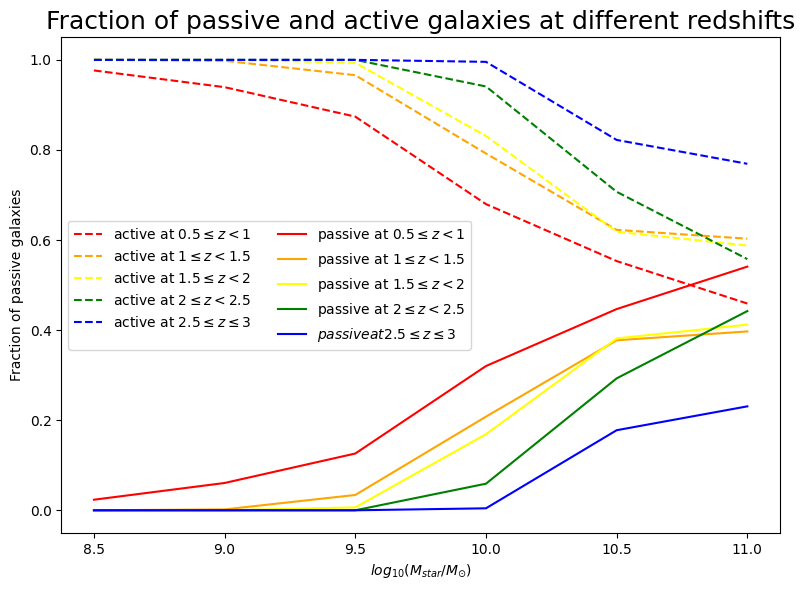

In [ ]:
mp.figure(figsize=(8, 6))
mp.plot(masses, t1_1/q1_1, '--', ms=2, color="red", label= 'active at $0.5 \leq z < 1$')
mp.plot(masses, t2_1/q2_1, '--', ms=2, color="orange", label='active at $1 \leq z < 1.5$')
mp.plot(masses, t3_1/q3_1, '--', ms=2, color="yellow", label='active at $1.5 \leq z < 2$')
mp.plot(masses, t4_1/q4_1, '--', ms=2, color="green", label='active at $2 \leq z < 2.5$')
mp.plot(masses, t5_1/q5_1, '--', ms=2, color="blue", label='active at $2.5 \leq z \leq 3$')

mp.plot(masses, fraction1,  ms=2, color="red", label='passive at $0.5 \leq z < 1$')
mp.plot(masses, fraction2,  ms=2, color="orange", label='passive at $1 \leq z < 1.5$')
mp.plot(masses, fraction3,  ms=2, color="yellow", label='passive at $1.5 \leq z < 2$')
mp.plot(masses, fraction4,  ms=2, color="green", label='passive at $2 \leq z < 2.5$')
mp.plot(masses, fraction5,  ms=2, color="blue", label='$passive at 2.5 \leq z \leq 3$')

mp.xlabel('$log_{10}(M_{star}/M_{\odot})$')
mp.ylabel('Fraction of passive galaxies')
mp.title('Fraction of passive and active galaxies at different redshifts', fontsize=18)
mp.legend(loc='center left', ncol=2,)
mp.tight_layout()

#mp.savefig('7_fractions.png')
#files.download('7_fractions.png')

mp.show()

- actually everithing is because at hig redshift we detect mainly the galaxies thet are much massive (so that have much flux)
- AGN feedback migliore per galassie più massive (in generale per i feedbacks)
- a basso redshift ci sono più galassie passive per gli overflowa più efficienti
- trend con la massa spiegato con supernova outflows e vince inflows
- aumento passive fraction con redshift: peggiorato inflows

quindi evidenza di feedbaks e evoluzione degli inflows

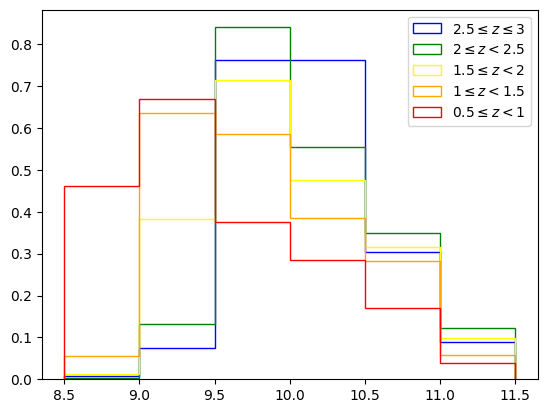

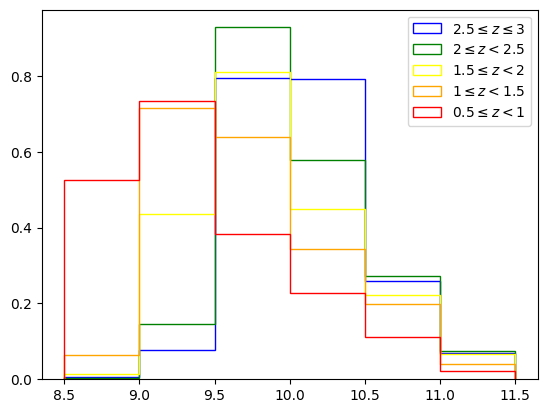

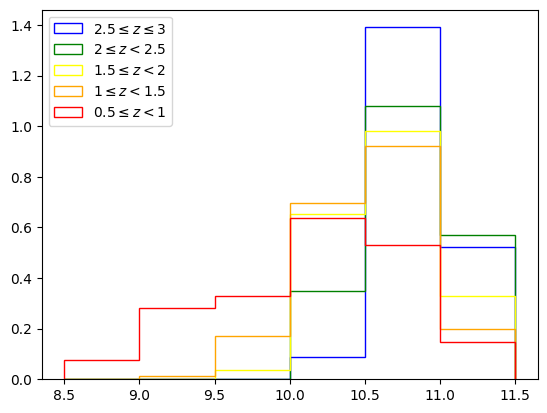

nuber density in each bin for each z range:  [[0.46168582 0.66858238 0.37484036 0.28512133 0.17081737 0.03895275]
 [0.05549672 0.63503495 0.58504554 0.38508791 0.28171997 0.05761491]
 [0.01259947 0.38328912 0.71485411 0.47480106 0.316313   0.09814324]
 [0.00234467 0.13130129 0.84056272 0.55568581 0.34818288 0.12192263]
 [0.00675676 0.07432432 0.76351351 0.76351351 0.30405405 0.08783784]] 
 bins limits:  [ 8.5  9.   9.5 10.  10.5 11.  11.5]
number density in each bin for each z range:  [[0.52647278 0.7334079  0.38255034 0.22632364 0.1103654  0.02087994]
 [0.06272444 0.71630357 0.63873593 0.34474503 0.19822839 0.03926263]
 [0.01436673 0.43705104 0.80982987 0.44990548 0.22306238 0.0657845 ]
 [0.002589   0.14498382 0.92815534 0.57734628 0.27184466 0.07508091]
 [0.00702988 0.07732865 0.7943761  0.79086116 0.26010545 0.07029877]] 
 bins limits:  [ 8.5  9.   9.5 10.  10.5 11.  11.5]
number density in each bin for each z range:  [[0.07555556 0.28222222 0.32888889 0.63555556 0.53111111 0.146666

In [ ]:
nt1, nt2, nt3= mp.hist([lmasstot_1, lmasstot_2, lmasstot_3, lmasstot_4, lmasstot_5],
             bins=6, range=(8.5, 11.5), density=True,
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z \leq 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
mp.legend()
mp.show()
np1, np2, np3= mp.hist([mass_a1, mass_a2, mass_a3, mass_a4, mass_a5],
             bins=6, range=(8.5, 11.5), density=True,
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z \leq 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
mp.legend()
mp.show()
na1, na2, na3= mp.hist([UVJ_lmass_1, UVJ_lmass_2, UVJ_lmass_3, UVJ_lmass_4, UVJ_lmass_5],
             bins=6, range=(8.5, 11.5), density=True,
             label=['$0.5 \leq z < 1$', '$1 \leq z < 1.5$', '$1.5 \leq z < 2$', '$2 \leq z < 2.5$', '$2.5 \leq z \leq 3$'],
             histtype='step', color=['red', 'orange', 'yellow', 'green', 'blue'])
mp.legend()
mp.show()
print('nuber density in each bin for each z range: ', nt1, '\n', 'bins limits: ', nt2)
print('number density in each bin for each z range: ', np1, '\n', 'bins limits: ', np2)
print('number density in each bin for each z range: ', na1, '\n', 'bins limits: ', na2)

In [ ]:
!sudo apt-get remove texlive-latex-recommended texlive-latex-extra texlive-fonts-recommended latex-extra --assume-yes

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package latex-extra
